# Library Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Read the data

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,Timestamp,Email address,Have you fully understood the purpose of this survey and how your information will be handled?,Informed Consent options,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,...,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,Which feature is the least important to you?,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?",What is the most important reason for your score above?,Ple
0,27/04/2024 09:26:15,NaN,Yes,I agree to participate in the survey,Female,45-59 (Middle-Aged Adults),Certificate or Diploma,Employed,Private Health Insurance purchased by self,"100,000-149,999",...,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Empathy : The level of caring and individualis...,Tangibles: The appearance of the hospital's fa...,10,My experience,NaN
1,26/04/2024 17:49:18,NaN,Yes,I agree to participate in the survey,Female,18 - 44 (Young Adults),Postgraduate Degree ( Master's Degree or Higher),Unemployed,"Out of Pocket - Cash,Mpesa,Credit or Debit Card","150,000 and above",...,Neutral,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Reliability : The hospital's ability to perfor...,Assurance : The knowledge and courtesy of the ...,10,"Well equiped, extremely Clean, and reliable se...",NaN
2,26/04/2024 23:42:19,NaN,Yes,I agree to participate in the survey,Female,18 - 44 (Young Adults),Bachelor's Degree,Employed,Private Health Insurance provided by my employer,"50,000-99,999",...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Reliability : The hospital's ability to perfor...,Tangibles: The appearance of the hospital's fa...,10,The employees show concern and care to patient...,NaN
3,27/04/2024 10:06:15,NaN,Yes,I agree to participate in the survey,Male,18 - 44 (Young Adults),Bachelor's Degree,Employed,Private Health Insurance provided by my employer,"150,000 and above",...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Empathy : The level of caring and individualis...,Tangibles: The appearance of the hospital's fa...,10,"The hospital has the best, qualified, empathet...",NaN
4,27/04/2024 12:29:21,NaN,Yes,I agree to participate in the survey,Male,18 - 44 (Young Adults),Postgraduate Degree ( Master's Degree or Higher),Employed,Private Health Insurance provided by my employer,"150,000 and above",...,Neutral,Neutral,Neutral,Neutral,Neutral,Reliability : The hospital's ability to perfor...,Tangibles: The appearance of the hospital's fa...,8,Good quality services.,NaN


### Checking for null values

In [3]:
halisi_df = df
halisi_df.isna().sum() * 100 / len(df)

Timestamp                                                                                                                                              0.0
Email address                                                                                                                                        100.0
Have you fully understood the purpose of this survey and how your information will be handled?                                                         0.0
Informed Consent options                                                                                                                               0.0
What gender do you identify as?                                                                                                                        0.0
What is your age?                                                                                                                                      0.0
What is the highest level of education you have completed?            

## Drop all the empty columns

In [4]:
halisi_df = halisi_df.drop(columns=['Ple','Email address'], axis=1)

## Data Description

#### Attaining the dimensions of the data

In [5]:
dimensions = halisi_df.shape 
print(f"Data has  {dimensions[0]} records and  {dimensions[1]} features/variables.")

Data has  24 records and  57 features/variables.


In [6]:
halisi_df.describe(include='object')

,Timestamp,Have you fully understood the purpose of this survey and how your information will be handled?,Informed Consent options,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment",...,The hospital's employees are consistently courteous to patients,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,Which feature is the least important to you?,What is the most important reason for your score above?
count,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
unique,24,1,1,2,2,3,3,5,5,3,...,3,3,3,3,3,3,3,5,4,24
top,27/04/2024 09:26:15,Yes,I agree to participate in the survey,Male,18 - 44 (Young Adults),Certificate or Diploma,Employed,Private Health Insurance provided by my employer,"49,999 and below",Strongly Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Reliability : The hospital's ability to perfor...,Tangibles: The appearance of the hospital's fa...,My experience
freq,1,24,24,13,21,10,20,14,8,17,...,14,15,14,16,16,12,19,9,17,1


#### Encoding of the DataFrame

# Encoding the Dataframe 

In [7]:
# encoding Yes..No response
categoryMappingYesNo = {'Yes': 0, 'No, I  have more questions':1}
halisi_df['Have you fully understood the purpose of this survey and how your information will be handled?'] = halisi_df['Have you fully understood the purpose of this survey and how your information will be handled?'].map(categoryMappingYesNo)

# encoding the gender 
categoryGender = {'Male': 0, 'Female':1, 'Other':2, 'Prefer not to say':2}
halisi_df['What gender do you identify as?'] = halisi_df['What gender do you identify as?'].map(categoryGender)

# encoding the 'Informed Consent options
categorConsentOptions = {'I agree to participate in the survey':0,'I do not agree to participate in the survey':1,}
halisi_df['Informed Consent options'] = halisi_df['Informed Consent options'].map(categorConsentOptions)

# encoding the 'Informed Consent options
categoryAges = {'18 - 44 (Young Adults)':0, '45-59 (Middle-Aged Adults)':1,'> 60 (Older Adults)':2,'Prefer not to say':3}
halisi_df['What is your age?'] = halisi_df['What is your age?'].map(categoryAges)

# encoding educarion levels
categoryEducationLevel = {'Primary Education':0,'Secondary Education':1,'Certificate or Diploma':2,"Bachelor's Degree":3,"Postgraduate Degree ( Master's Degree or Higher)":4,"Prefer not to say":5 }
halisi_df['What is the highest level of education you have completed?']= halisi_df['What is the highest level of education you have completed?'].map(categoryEducationLevel)

# encoding 'What is your current work status?'
categoryWorkStatus = {'Unemployed': 0,    'Employed': 1,    'Self-Employed': 2,    'Retired': 3,    'Disabled - Not able to work': 4,    'Prefer not to say': 5
}
halisi_df['What is your current work status?'] = halisi_df['What is your current work status?'].map(categoryWorkStatus)

# encoding 'How do you pay for the majority of your medical expenses?'
categoryPaymentMethod = {
    'Out of Pocket - Cash,Mpesa,Credit or Debit Card': 0,
    'NHIF Only': 1,
    'Private Health Insurance provided by my employer': 2,
    'Private Health Insurance purchased by self': 3,
    'Prefer not to say': 4
}
halisi_df['How do you pay for the majority of your medical expenses?'] = halisi_df['How do you pay for the majority of your medical expenses?'].map(categoryPaymentMethod)

# encoding income
categoryIncome = { 
    '49,999 and below': 0,
    '50,000-99,999': 1,
    '100,000-149,999': 2,
    '150,000 and above': 3,
    'Prefer not to say': 4
}
halisi_df['What is your average monthly household income?'] = halisi_df['What is your average monthly household income?'].map(categoryIncome)

# encoding the tangibles
categoryMostImportantTangibles ={
    "Tangibles : The appearance of the hospital's facilities, equipment, personnel, and communication materials.":1,
    "Reliability : The hospital's ability to perform the promised service dependably and accurately.":2,
    "Responsiveness : The hospital's willingness to help patients and provide prompt service.":3,
    "Assurance : The knowledge and courtesy of the hospital's employees and their ability to convey trust and confidence.":4,
    "Empathy : The level of caring and individualised attention the hospital provides its patients.":5

}
categorLeastImportantTangibles ={
    "Tangibles: The appearance of the hospital's facilities, equipment, personnel, and communication materials.":1,
    "Reliability : The hospital's ability to perform the promised service dependably and accurately.":2,
    "Responsiveness : The hospital's willingness to help patients and provide prompt service.":3,
    "Assurance : The knowledge and courtesy of the hospital's employees and their ability to convey trust and confidence.":4,
    "Empathy: The level of caring and individualised attention the hospital provides its patients.":5

}
halisi_df['Which feature is the most important to you?'] = halisi_df['Which feature is the most important to you?'].map(categoryMostImportantTangibles)
halisi_df['Which feature is the least important to you?'] = halisi_df['Which feature is the least important to you?'].map(categorLeastImportantTangibles)


# encoding agree...strongly agree... sentiments 
categoryAgreeDisagree = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# loop through and encode columns from 'The hospital should have modern, up-to-date equipment' to 'The operating hours of the hospital are convenient for all its patients'
# Get the index of the starting and ending columns
startColumnIndex = halisi_df.columns.get_loc('The hospital should have modern, up-to-date equipment')
endColumnIndex = halisi_df.columns.get_loc('The operating hours of the hospital are convenient for all its patients')

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    halisi_df[columnName] = halisi_df[columnName].map(categoryAgreeDisagree)





In [8]:
halisi_df

,Timestamp,Have you fully understood the purpose of this survey and how your information will be handled?,Informed Consent options,What gender do you identify as?,What is your age?,What is the highest level of education you have completed?,What is your current work status?,How do you pay for the majority of your medical expenses?,What is your average monthly household income?,"The hospital should have modern, up-to-date equipment",...,The hospital's employees are knowledgeable and able to answer patients' questions,The hospital gives each patient individualised attention,The hospital's employees express care in their interaction with patients,The hospital and its employees have the patients' best interests at heart,The hospital's employees understand the specific needs of each of their patients,The operating hours of the hospital are convenient for all its patients,Which feature is the most important to you?,Which feature is the least important to you?,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?",What is the most important reason for your score above?
0,27/04/2024 09:26:15,0,0,1,1,2,1,3,2,4,...,5,4,5,5,5,5,5,1,10,My experience
1,26/04/2024 17:49:18,0,0,1,0,4,0,0,3,4,...,4,3,5,5,3,5,2,4,10,"Well equiped, extremely Clean, and reliable se..."
2,26/04/2024 23:42:19,0,0,1,0,3,1,2,1,5,...,5,5,5,5,5,5,2,1,10,The employees show concern and care to patient...
3,27/04/2024 10:06:15,0,0,0,0,3,1,2,3,4,...,5,5,5,5,5,5,5,1,10,"The hospital has the best, qualified, empathet..."
4,27/04/2024 12:29:21,0,0,0,0,4,1,2,3,4,...,3,3,3,3,3,3,2,1,8,Good quality services.
5,27/04/2024 12:54:28,0,0,0,0,2,1,2,0,5,...,5,4,4,4,3,5,3,1,10,The hospital has proven to be able to care and...
6,27/04/2024 13:13:36,0,0,0,0,3,1,2,1,5,...,5,4,5,5,4,5,3,1,10,The employees are always ready to help the pat...
7,27/04/2024 13:14:11,0,0,0,0,2,1,2,0,5,...,5,5,5,5,5,5,2,4,9,1.We don't offer all services e.g Dental/Optic...
8,27/04/2024 13:16:38,0,0,0,1,4,1,2,3,5,...,5,5,5,5,5,5,3,5,10,It is obvious
9,27/04/2024 13:25:00,0,0,1,0,2,1,2,1,5,...,4,5,5,5,5,5,3,1,10,"Provision of prompt ,individualized and timely..."


## Visualizations

In [9]:
# targeting the 'Which feature is the most important to you?'
def plotPieChart(df,targetColumn,encoding, title):
    plt.figure(figsize=(10,8))	
    counts = df[targetColumn].value_counts()
    plt.title(title)
    plt.pie(counts,
    # labels=counts.index ,#counts.index.map({v: k for k, v in encoding.items()}),
    autopct='%1.1f%%', startangle=140, radius=0.7)
    legendLabels = counts.index.map({v: k for k, v in encoding.items()})
    plt.legend(legendLabels ,loc='lower right',  fontsize='x-small', title='Categories')
    plt.tight_layout()
    plt.show()

#  with encoding
def plotBarChart(df, targetColumn, encoding, title):
    plt.figure(figsize=(10, 8))
    counts = df[targetColumn].value_counts()
    plt.title(title)
    plt.bar(counts.index.map({v: k for k, v in encoding.items()}), counts)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

#  without encoding - for numerical
def barChart(df, targetColumn, title):
    plt.figure(figsize=(13, 6))
    counts = df[targetColumn].value_counts()
    plt.title(title)
    plt.bar(counts.index, counts)

    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

<hr>

## Client Analysis 

<hr>

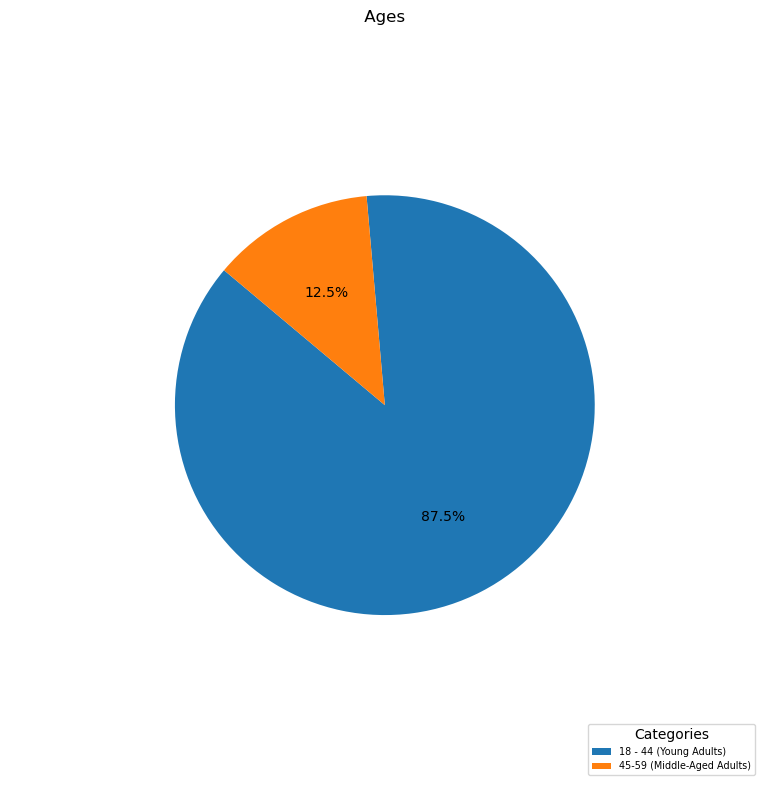

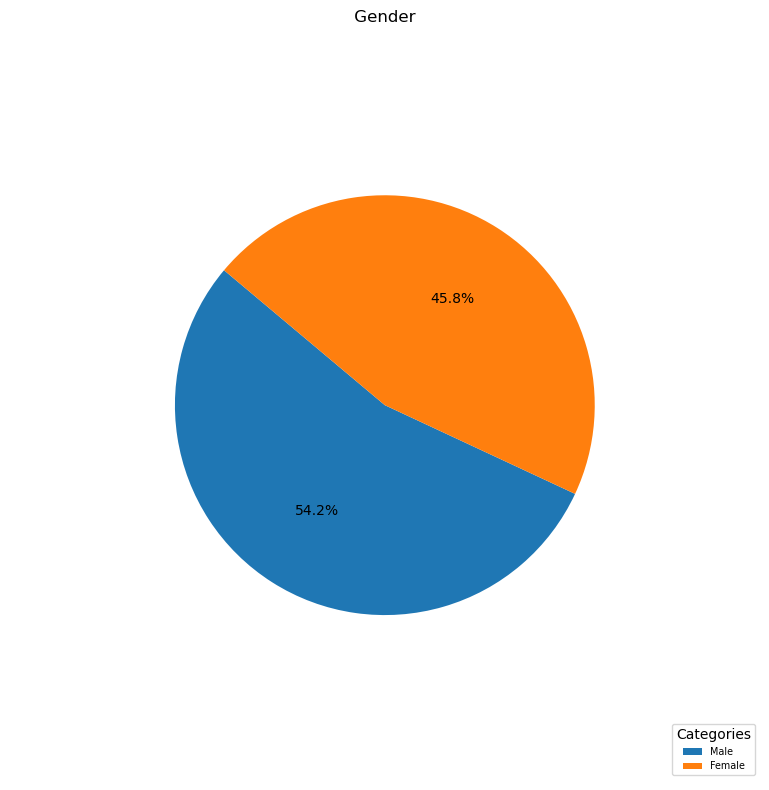

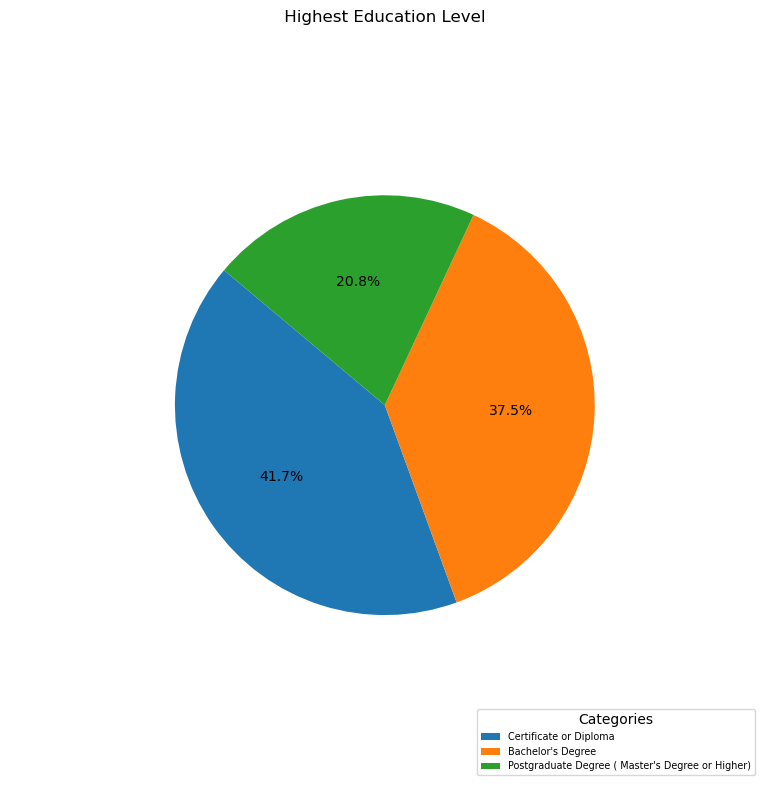

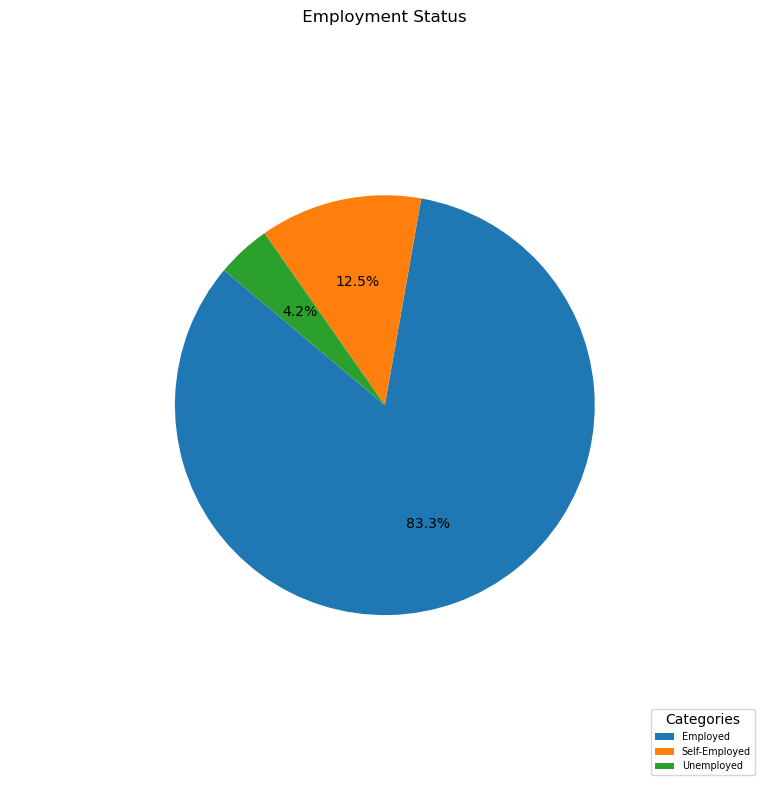

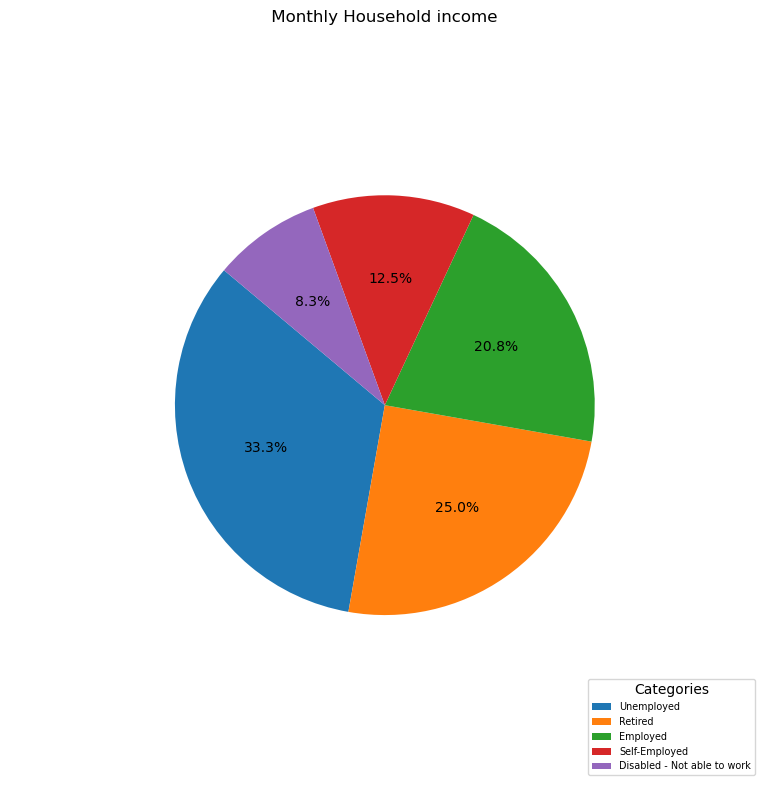

In [10]:
# Age
plotPieChart(halisi_df,"What is your age?", categoryAges,' Ages ')

#Gender
plotPieChart(halisi_df,"What gender do you identify as?", categoryGender,' Gender ')

#Highest level of education
plotPieChart(halisi_df,"What is the highest level of education you have completed?", categoryEducationLevel,' Highest Education Level ')

# What is your current work status?
plotPieChart(halisi_df,"What is your current work status?", categoryWorkStatus,' Employment Status ')

# What is your average monthly household income?
plotPieChart(halisi_df,"What is your average monthly household income?", categoryWorkStatus,' Monthly Household income ')


<hr>

## Based on mode of payments 

<hr>

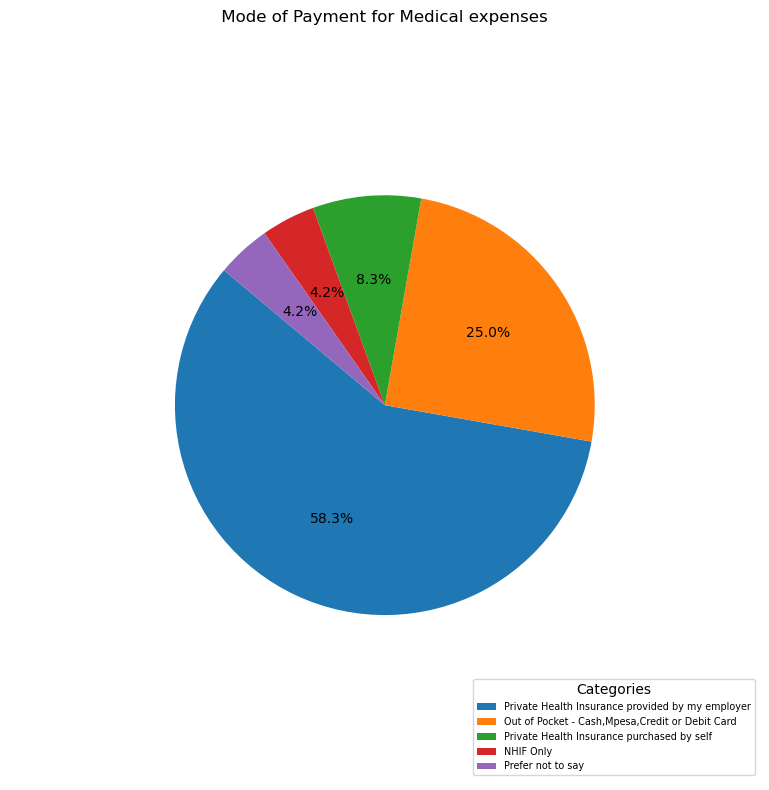

In [11]:
# payment style
plotPieChart(halisi_df,"How do you pay for the majority of your medical expenses?", categoryPaymentMethod,' Mode of Payment for Medical expenses ')

<hr>

## Relative Important Hospital Features 

<hr>

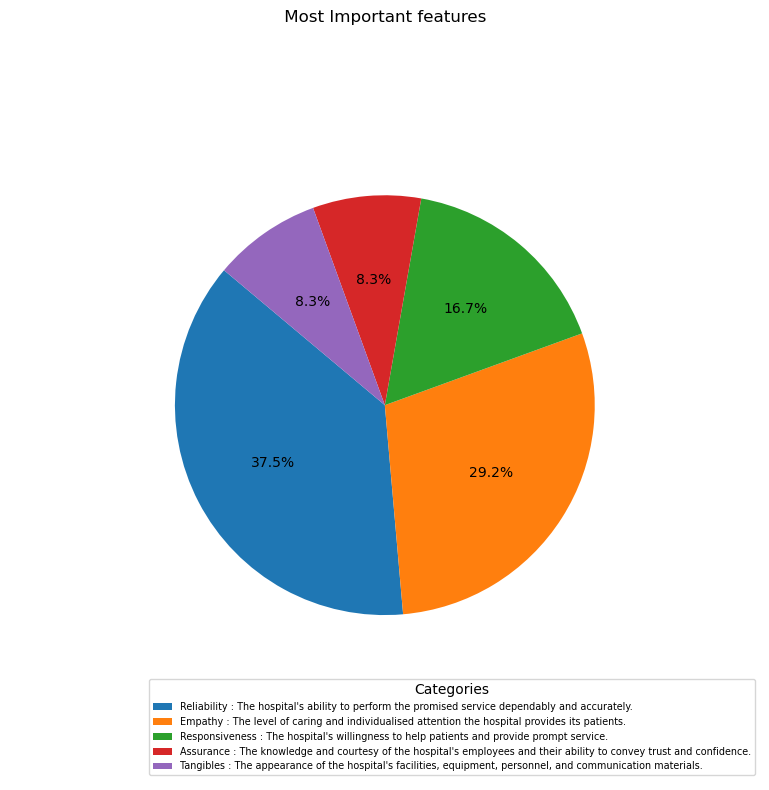

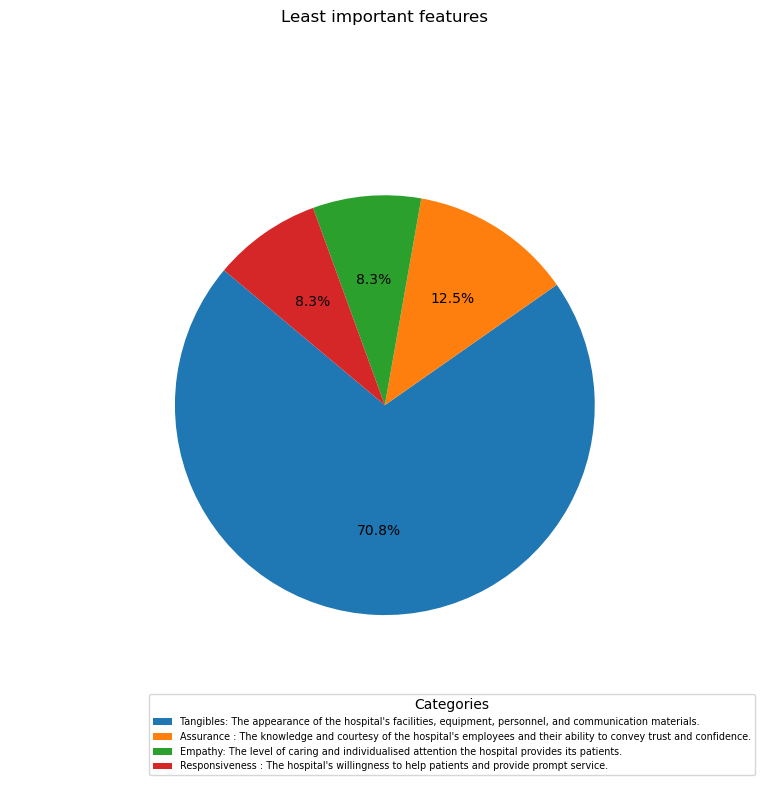

In [12]:
# most important feature
plotPieChart(halisi_df, 'Which feature is the most important to you?', categoryMostImportantTangibles, ' Most Important features ')
# least important feature
plotPieChart(halisi_df, 'Which feature is the least important to you?', categorLeastImportantTangibles, 'Least important features')

<hr>

## How likely is the client to give recommendation 

<hr>

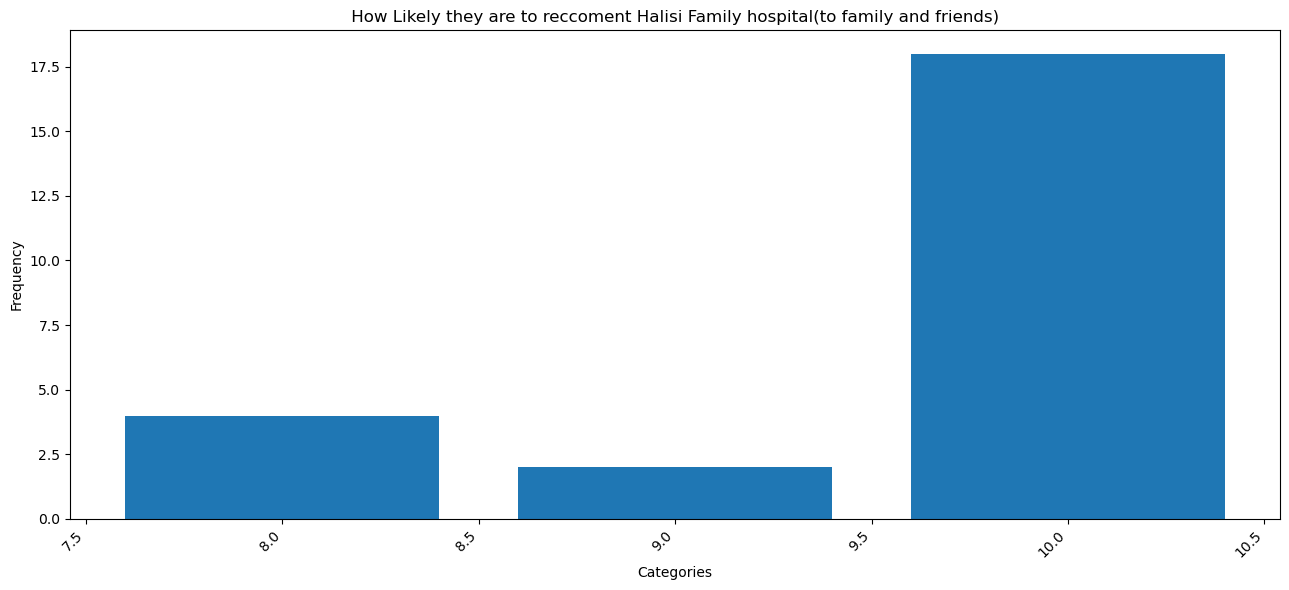

In [13]:
# Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?
barChart(halisi_df,"Considering your overall experience at Halisi family Hospital, how likely are you to recommend Halisi Family Hospital to your family and friends?", ' How Likely they are to reccoment Halisi Family hospital(to family and friends) ')

<hr>

## Deeper Visual insights on Hospital Services based on Expectations(Tangibles) 

<hr>

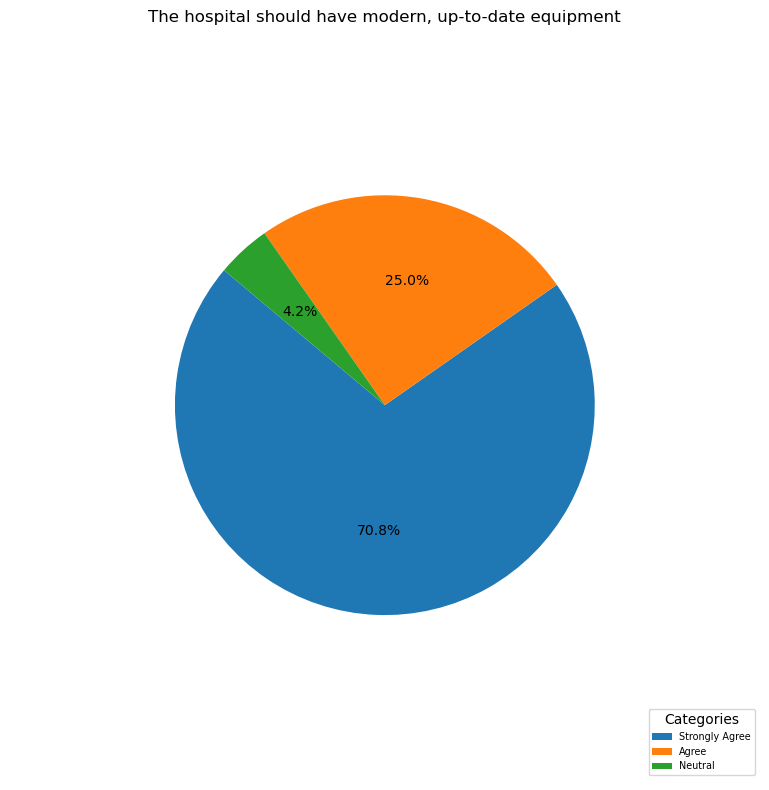

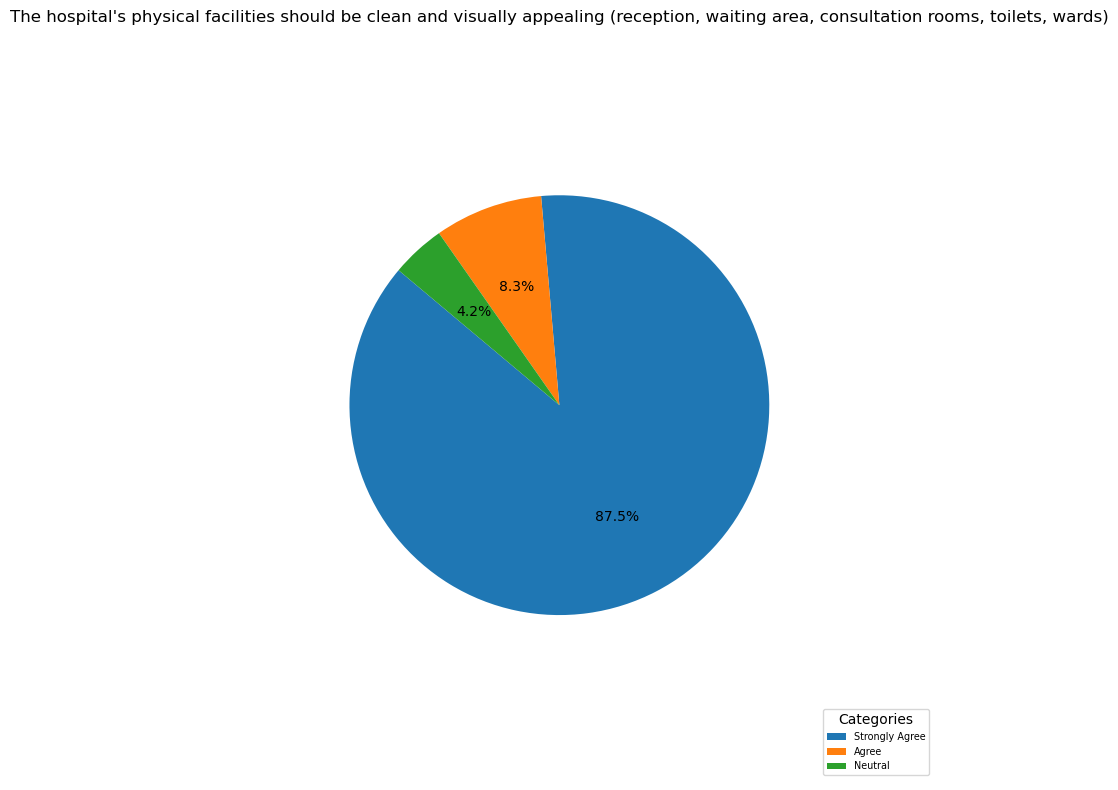

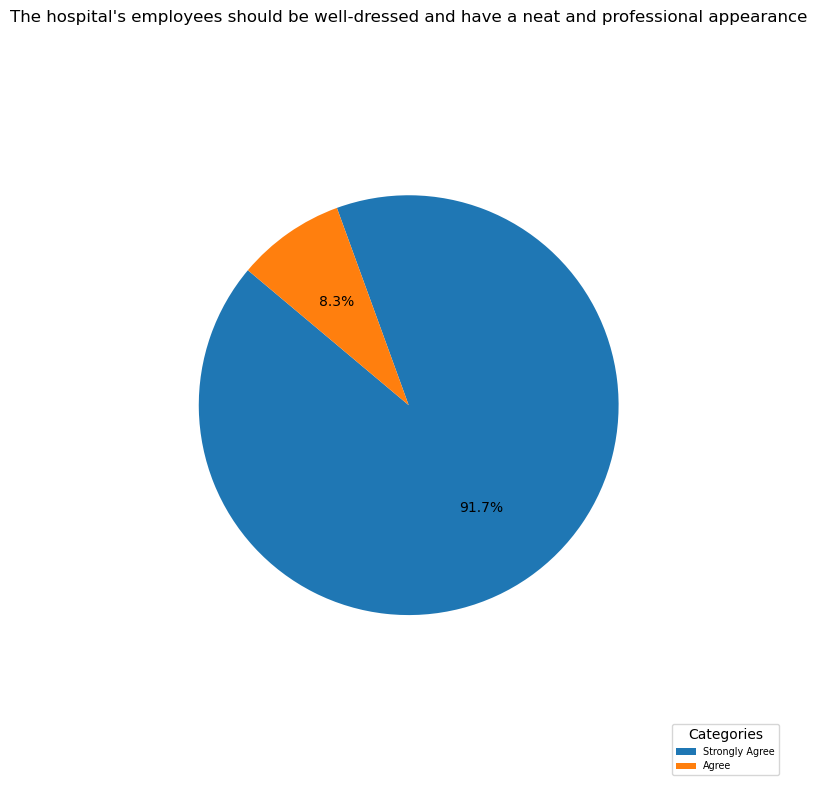

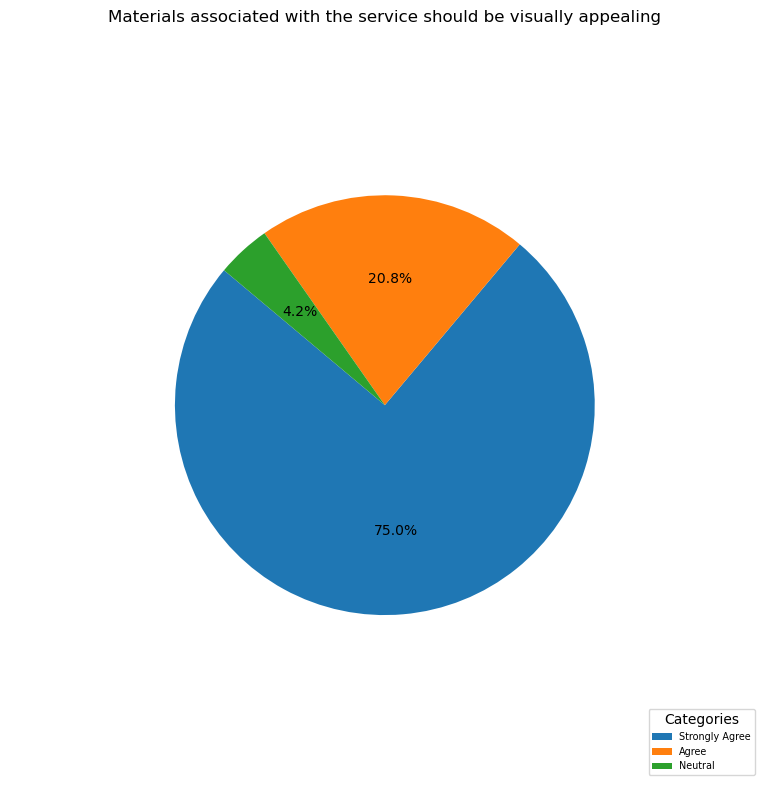

In [14]:
startColumnIndex = halisi_df.columns.get_loc('The hospital should have modern, up-to-date equipment')
endColumnIndex = halisi_df.columns.get_loc('Materials associated with the service should be visually appealing')

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Expectations(Reliability) 

<hr>

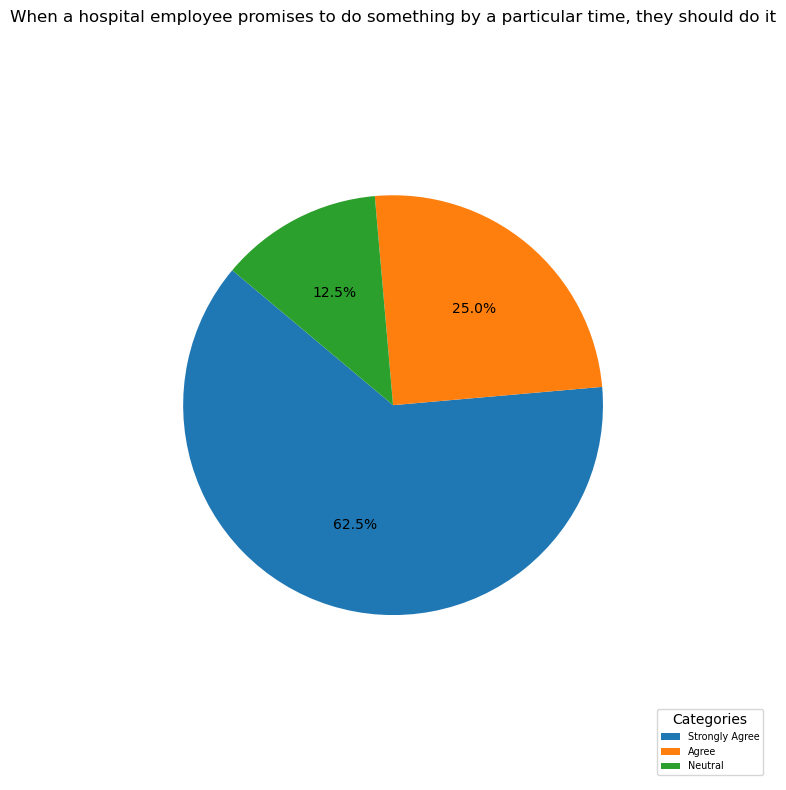

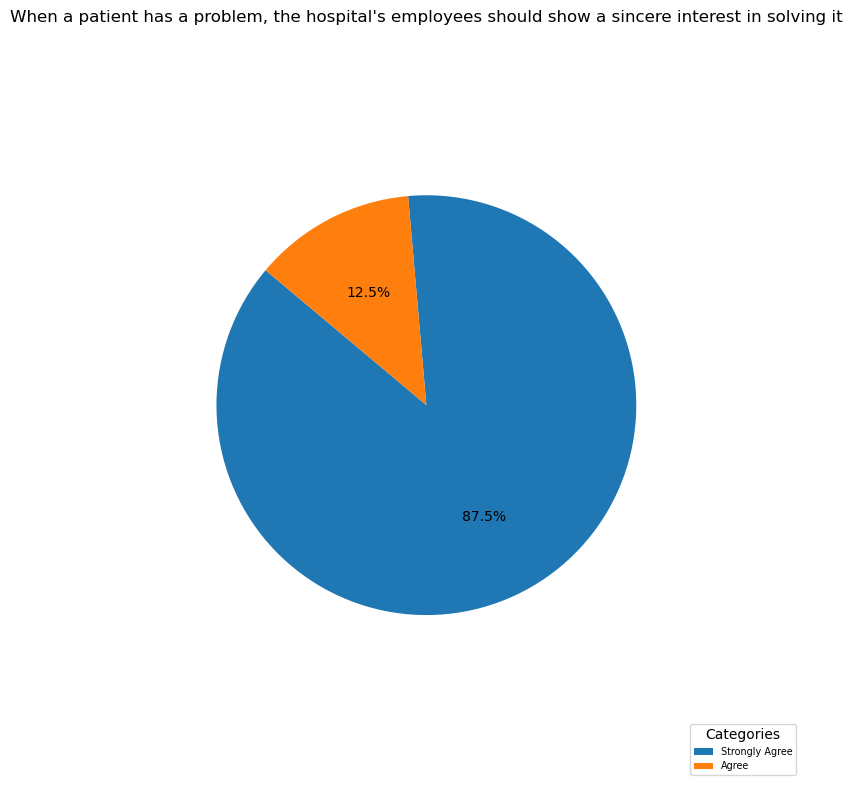

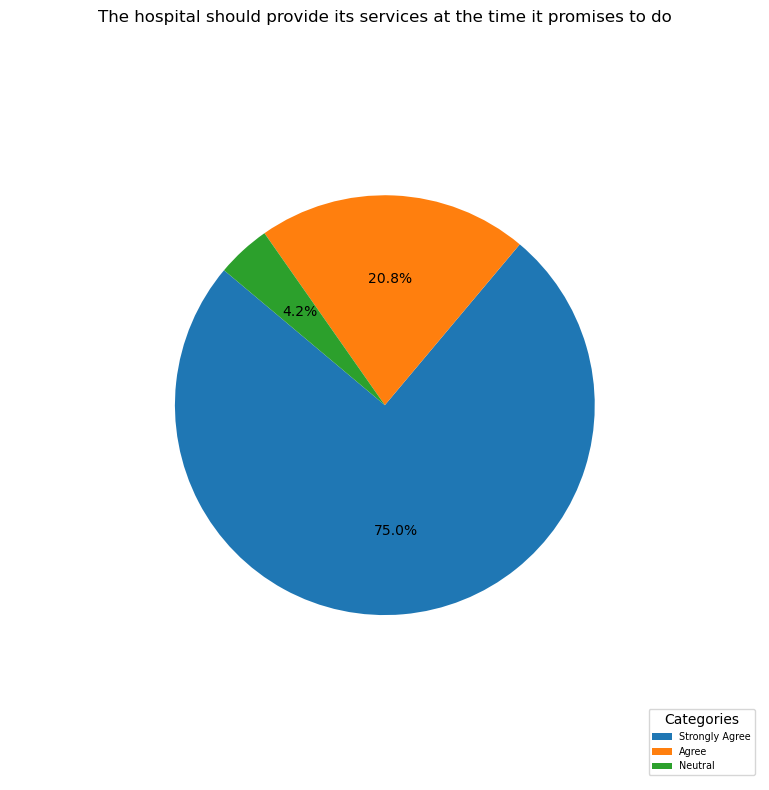

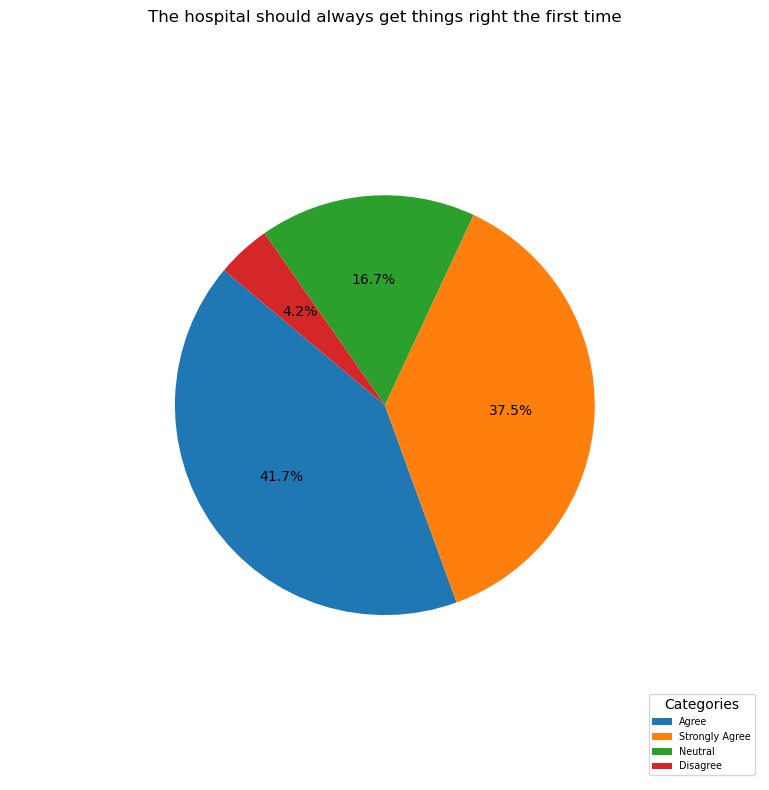

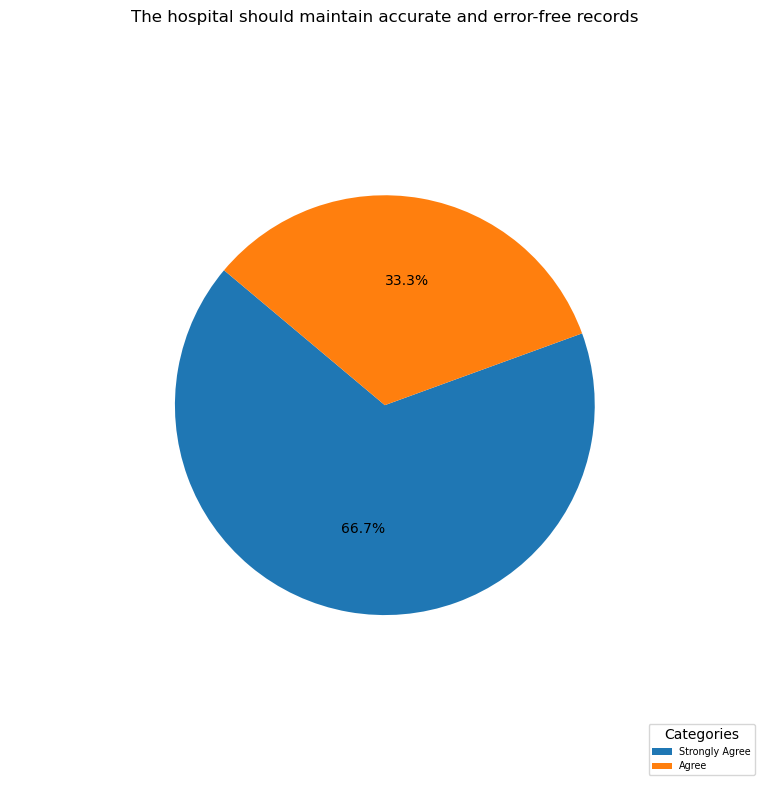

In [15]:
startColumnIndex = halisi_df.columns.get_loc('When a hospital employee promises to do something by a particular time, they should do it')
endColumnIndex = halisi_df.columns.get_loc('The hospital should maintain accurate and error-free records')

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Expectations(Responsiveness)

<hr>

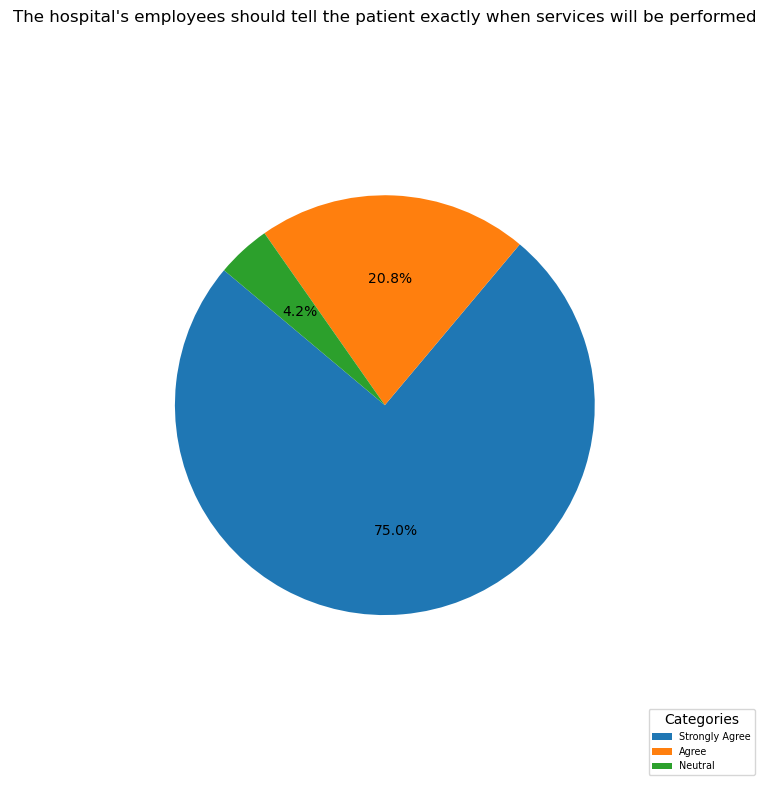

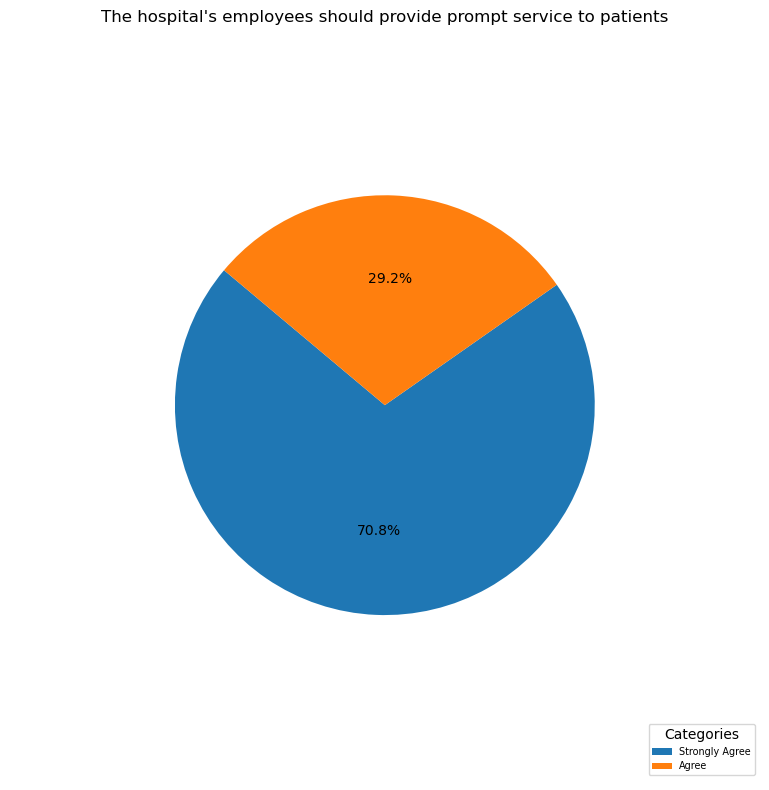

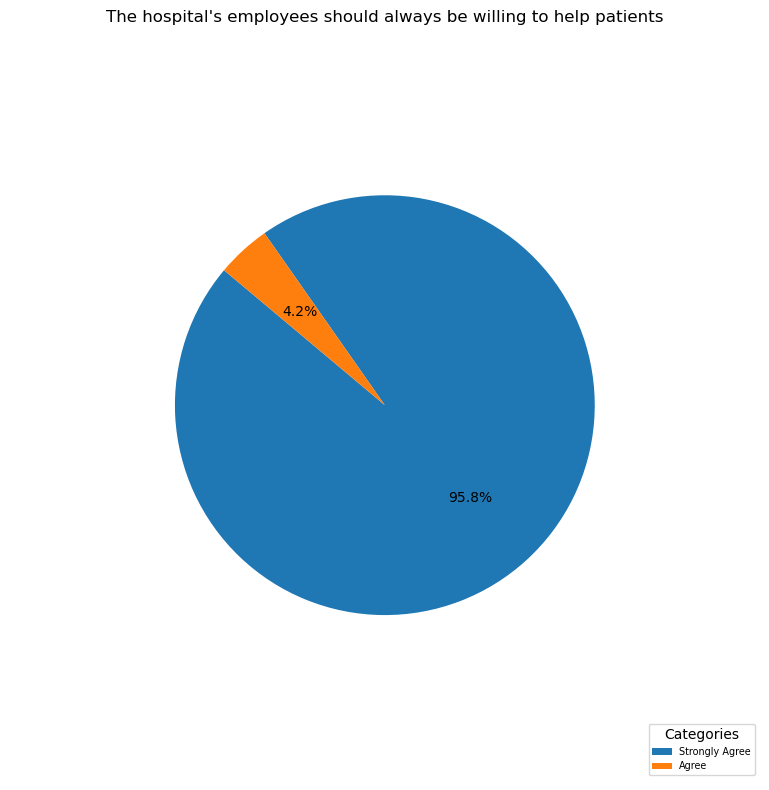

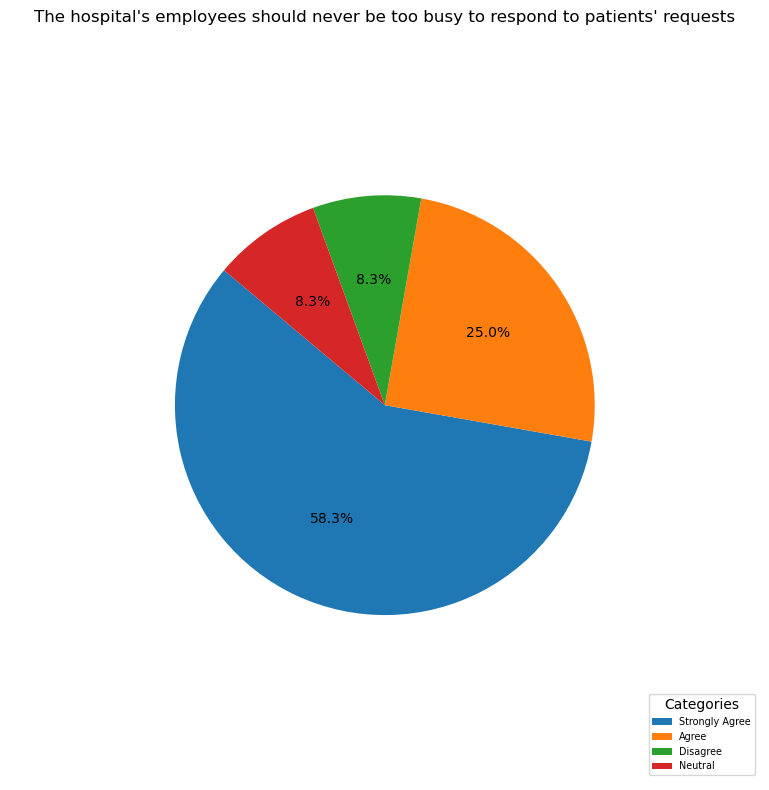

In [16]:
startColumnIndex = halisi_df.columns.get_loc("The hospital's employees should tell the patient exactly when services will be performed")
endColumnIndex = halisi_df.columns.get_loc("The hospital's employees should never be too busy to respond to patients' requests")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Expectations(Assurance)

<hr>

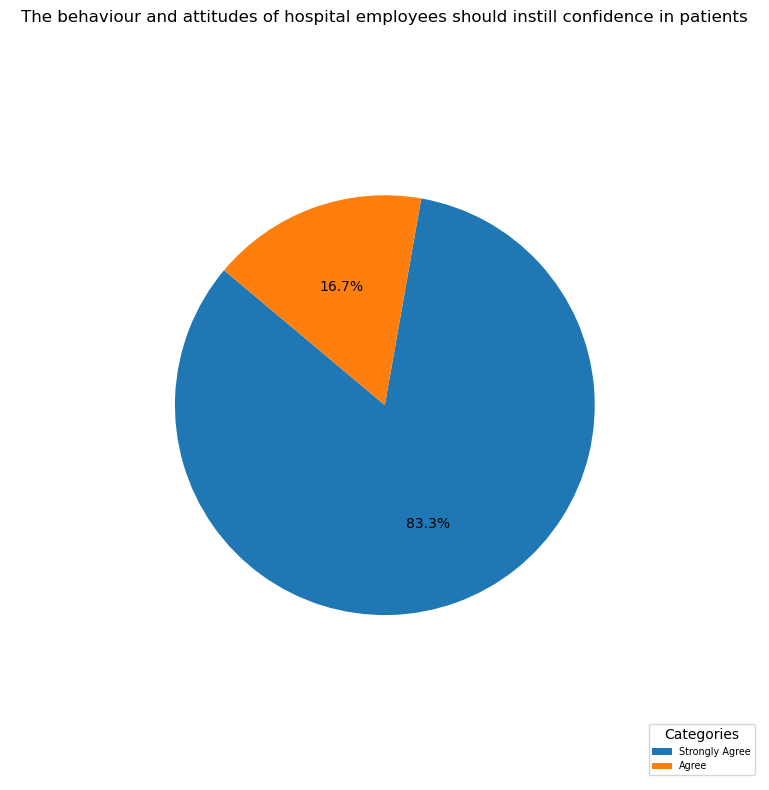

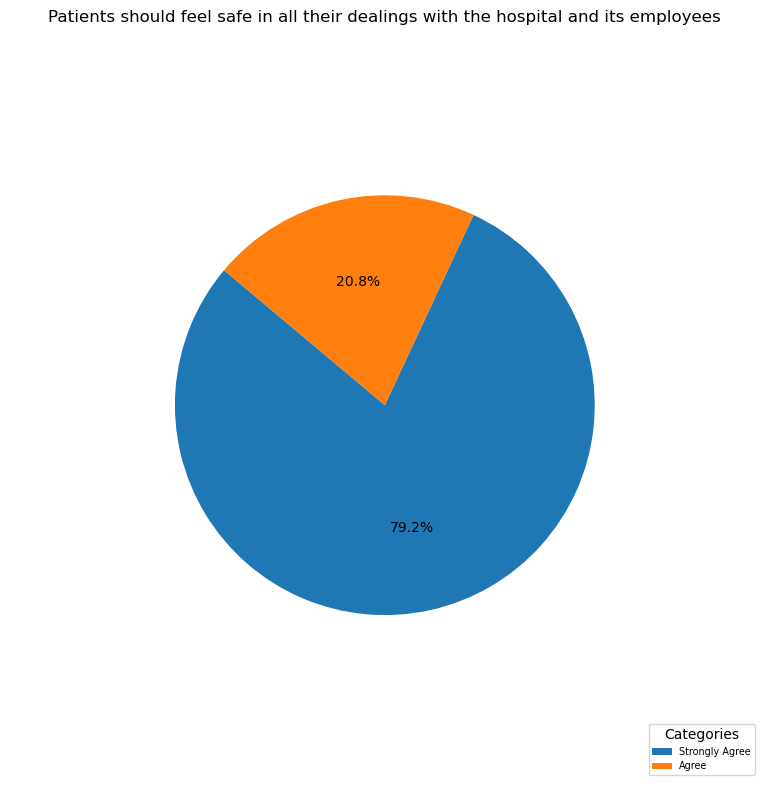

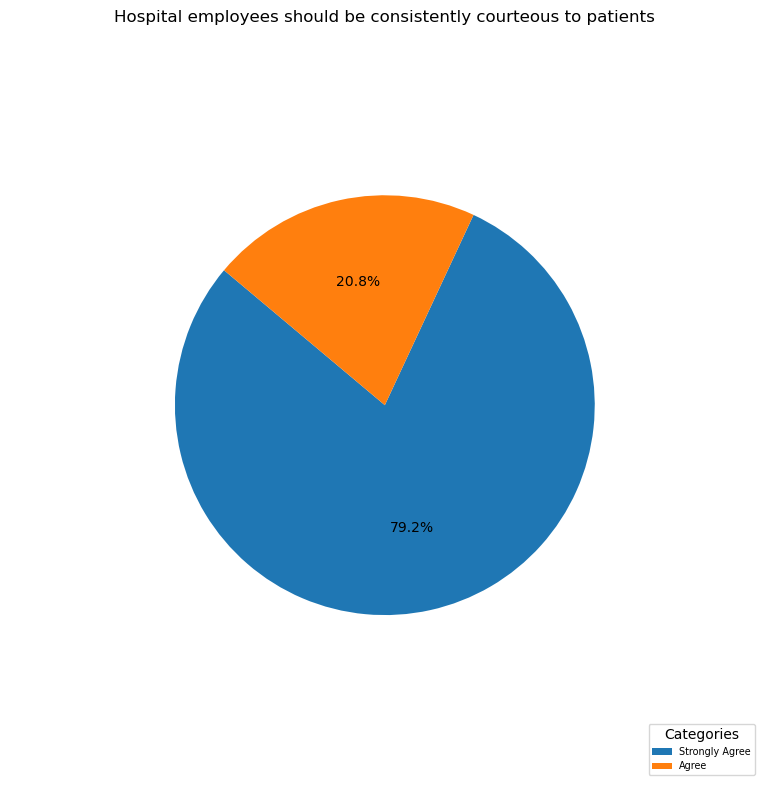

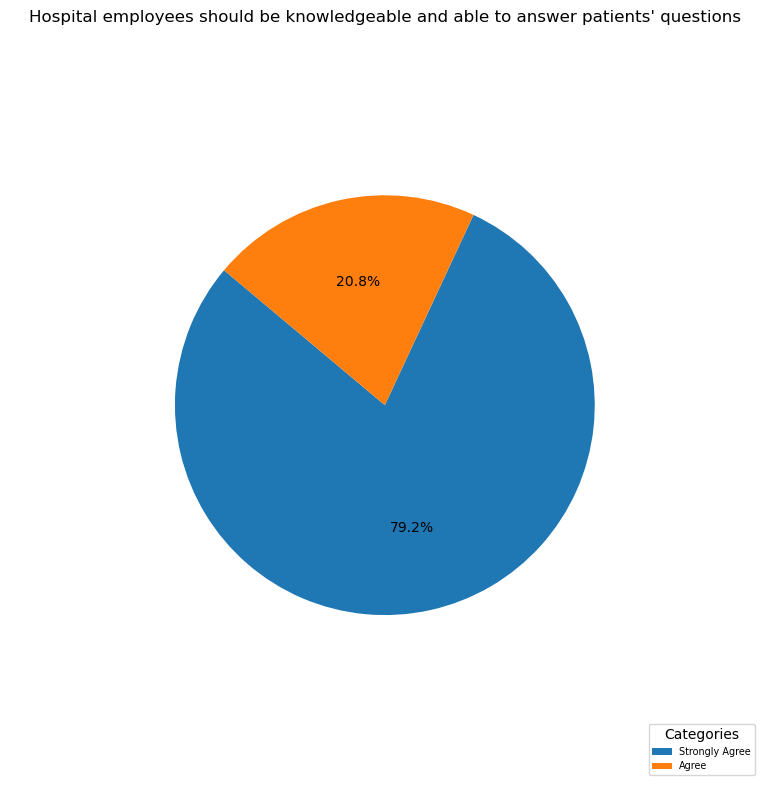

In [17]:
startColumnIndex = halisi_df.columns.get_loc("The behaviour and attitudes of hospital employees should instill confidence in patients")
endColumnIndex = halisi_df.columns.get_loc("Hospital employees should be knowledgeable and able to answer patients' questions")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Expectations(Empathy)

<hr>

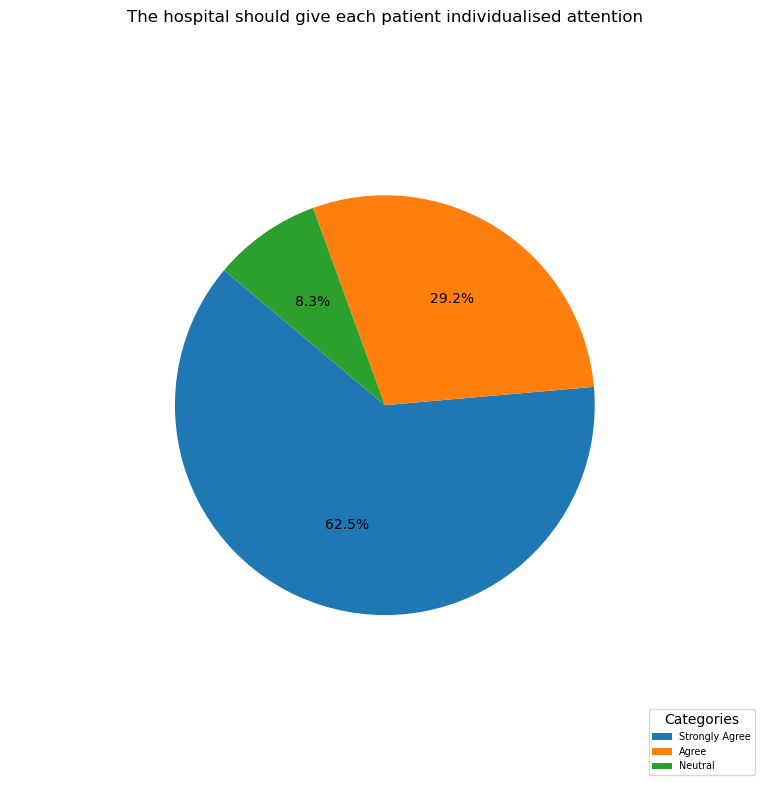

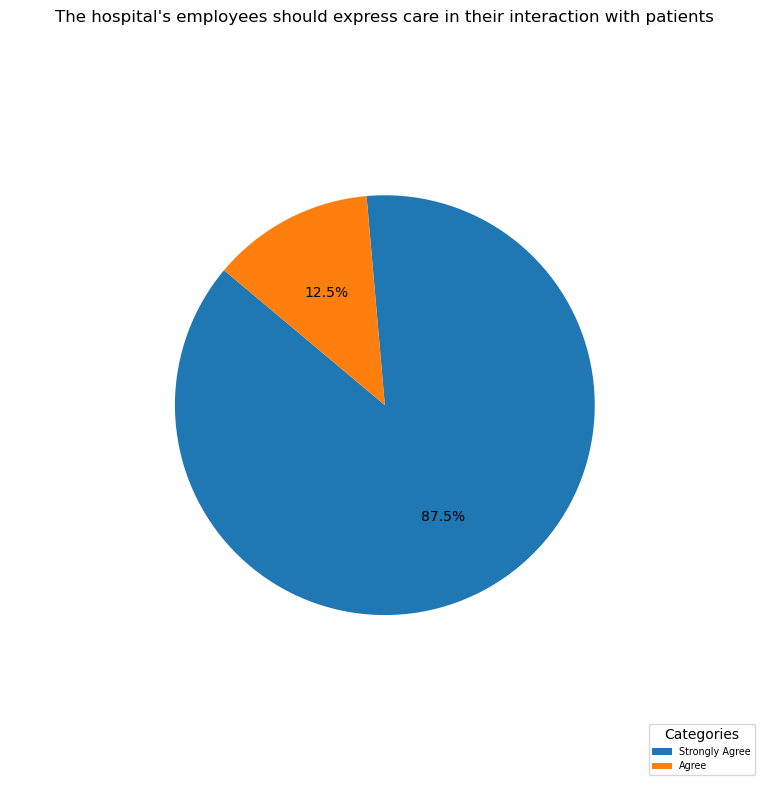

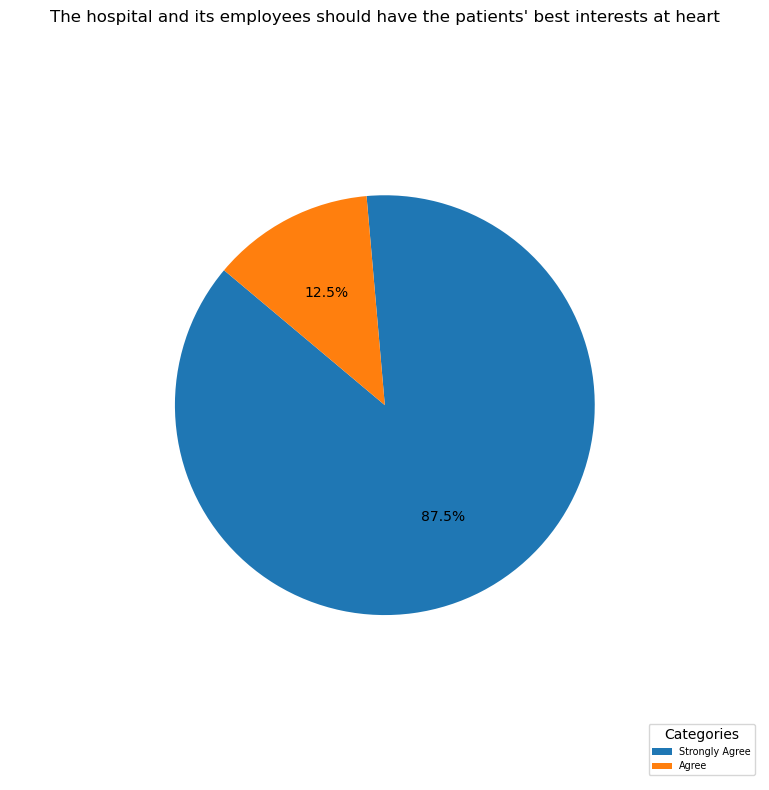

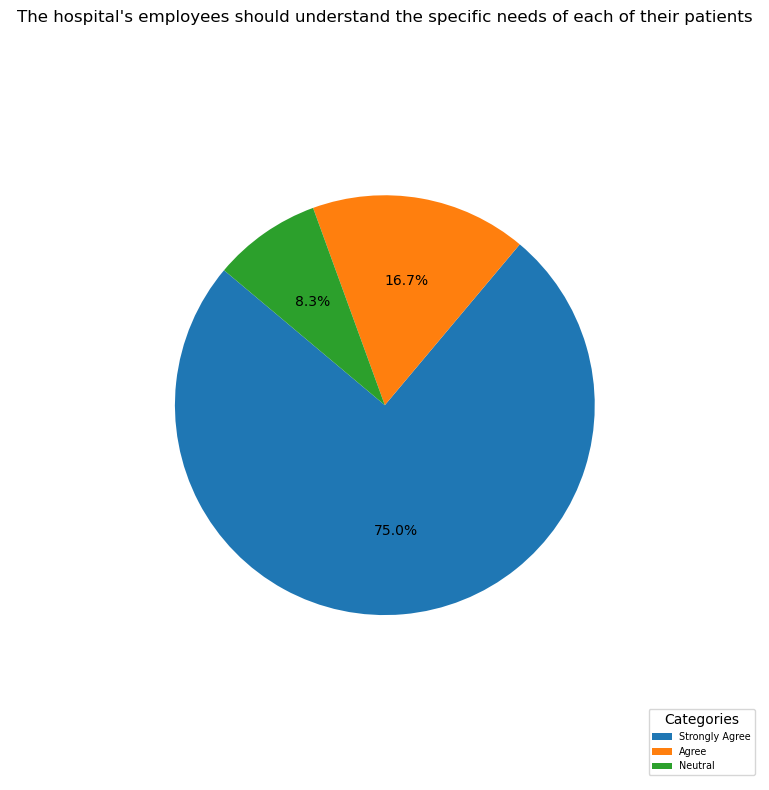

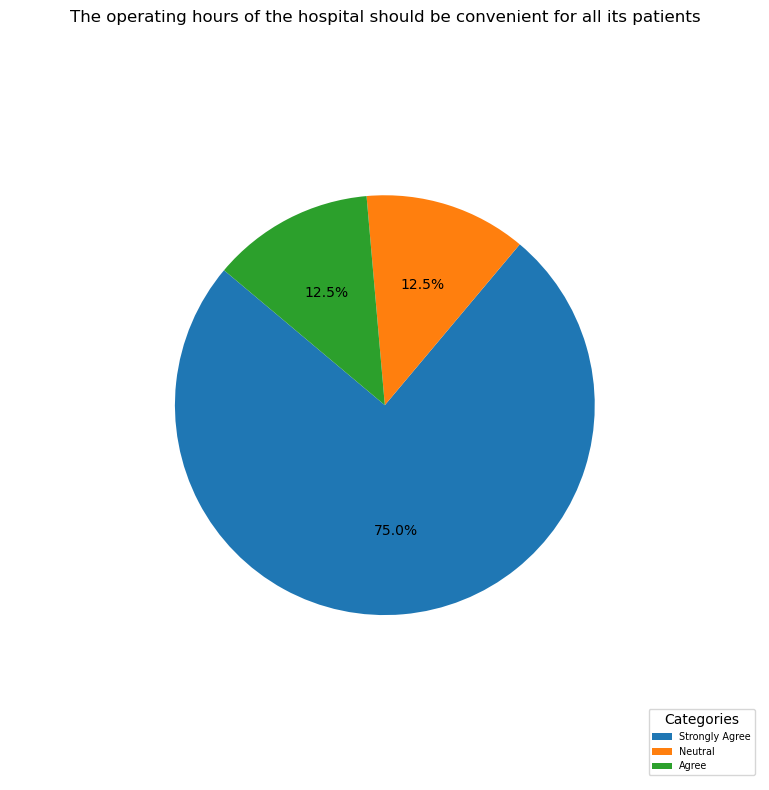

In [18]:
startColumnIndex = halisi_df.columns.get_loc("The hospital should give each patient individualised attention")
endColumnIndex = halisi_df.columns.get_loc("The operating hours of the hospital should be convenient for all its patients")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Perception(Tangibles)

<hr>

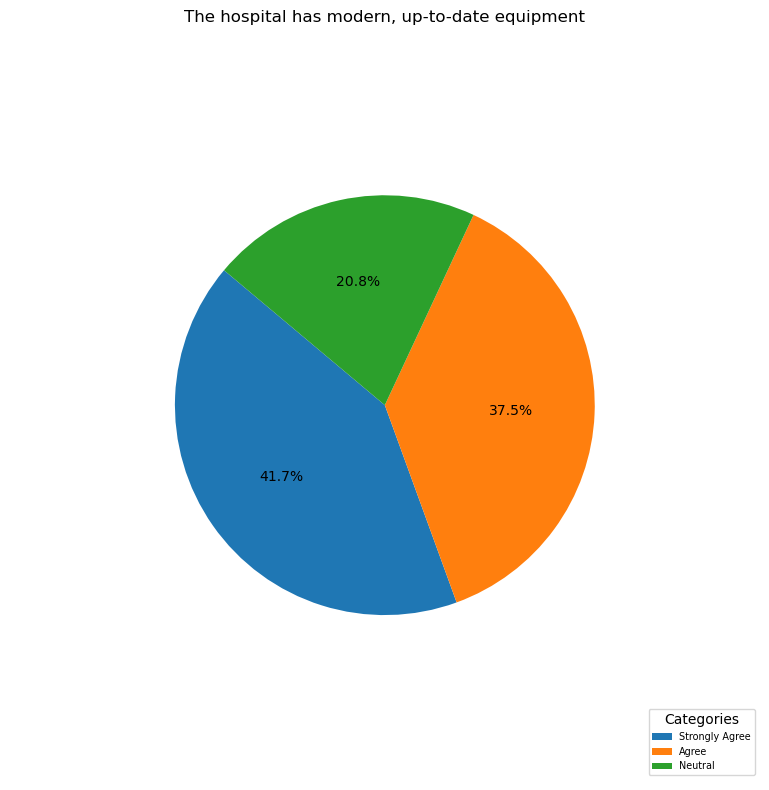

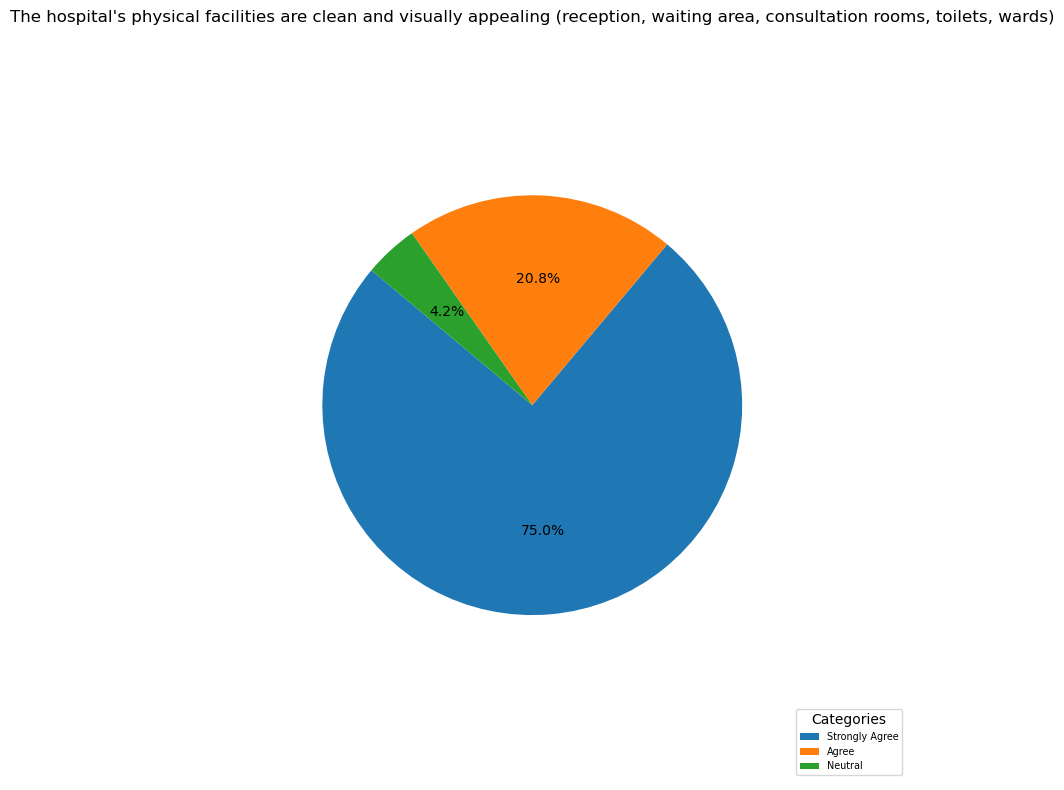

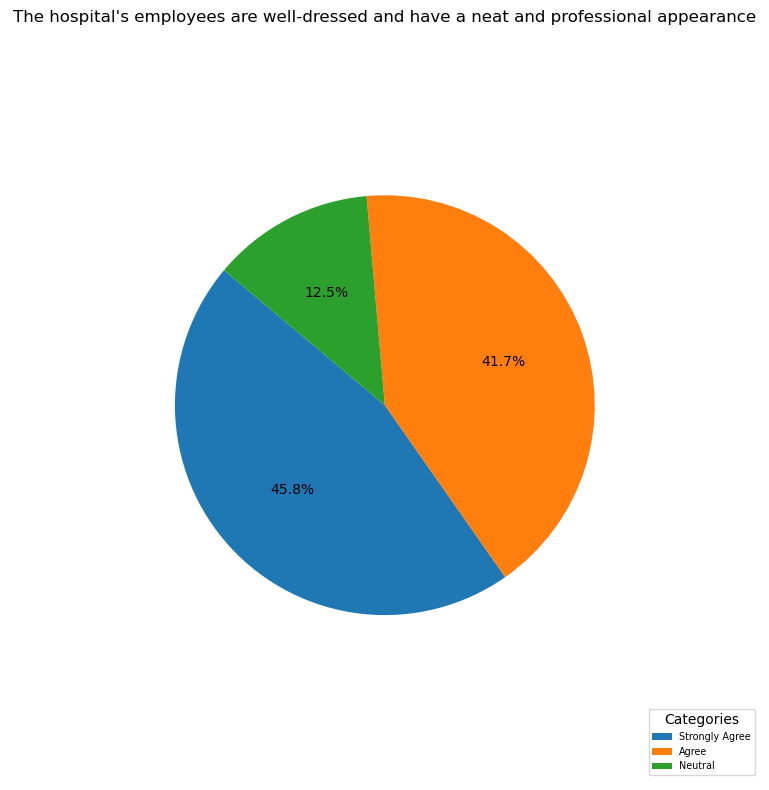

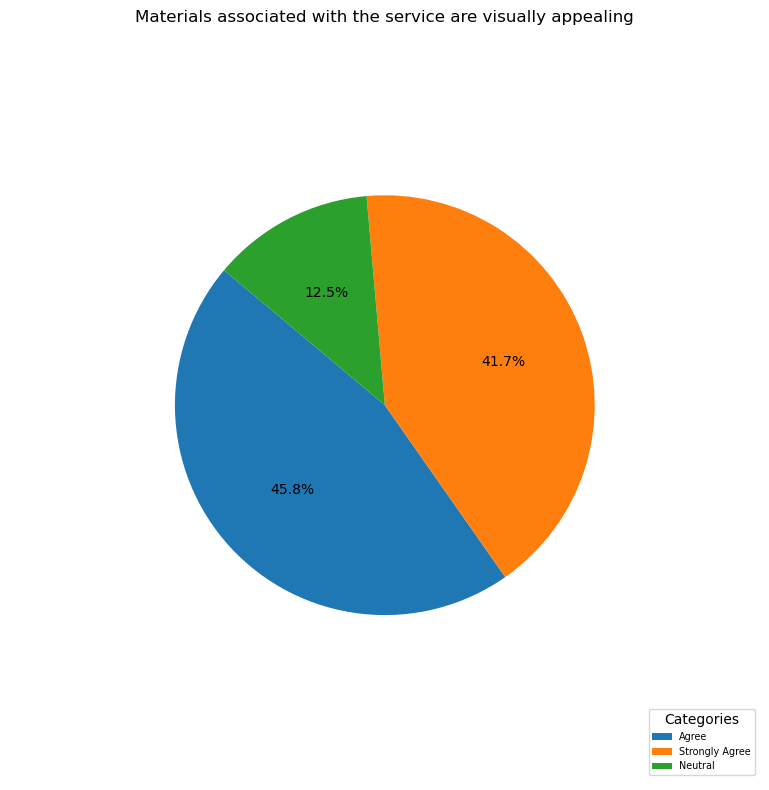

In [19]:
startColumnIndex = halisi_df.columns.get_loc("The hospital has modern, up-to-date equipment")
endColumnIndex = halisi_df.columns.get_loc("Materials associated with the service are visually appealing")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Perception(Reliability)

<hr>

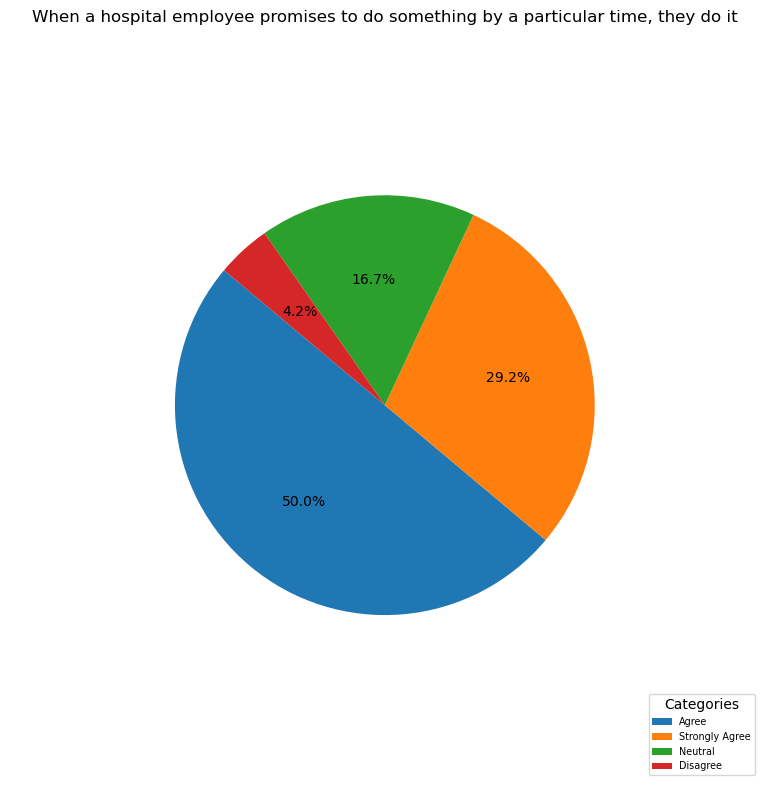

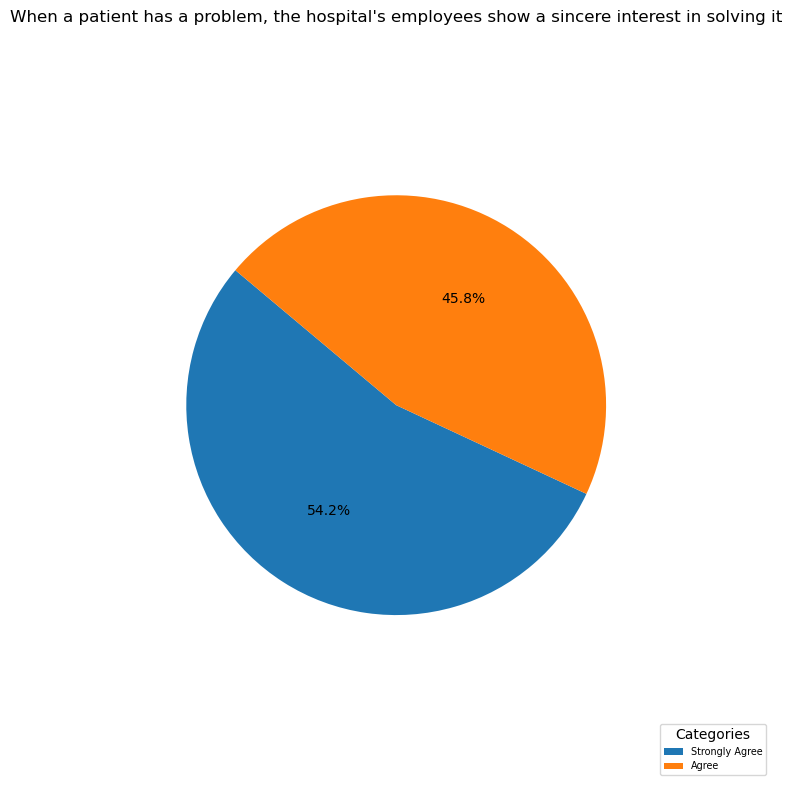

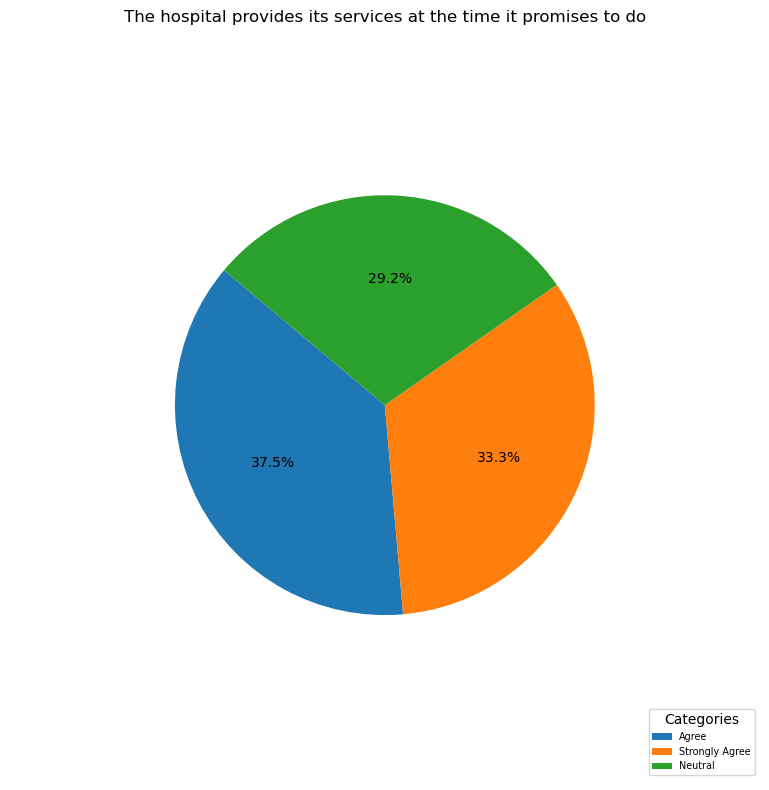

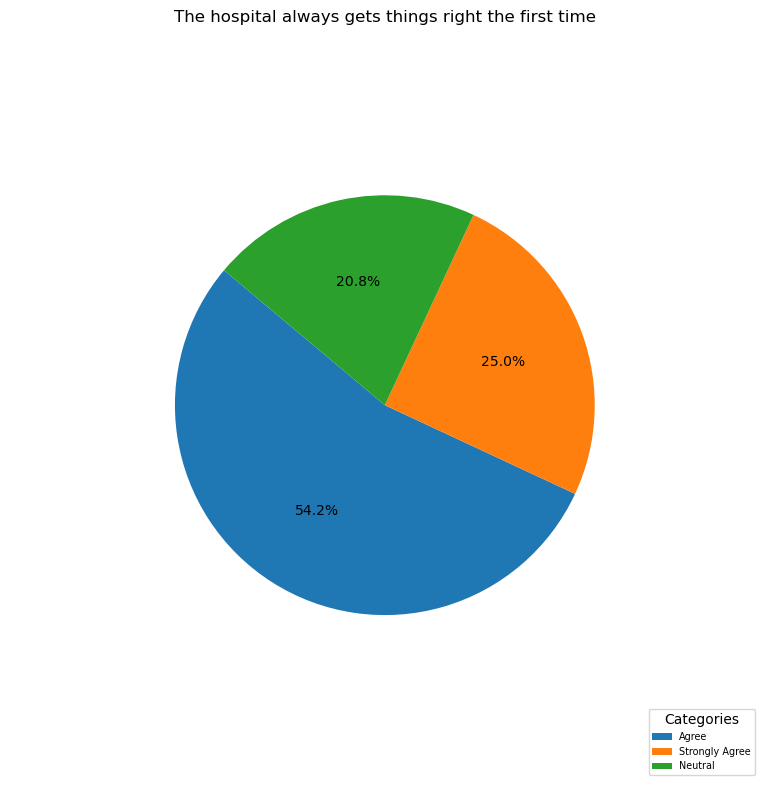

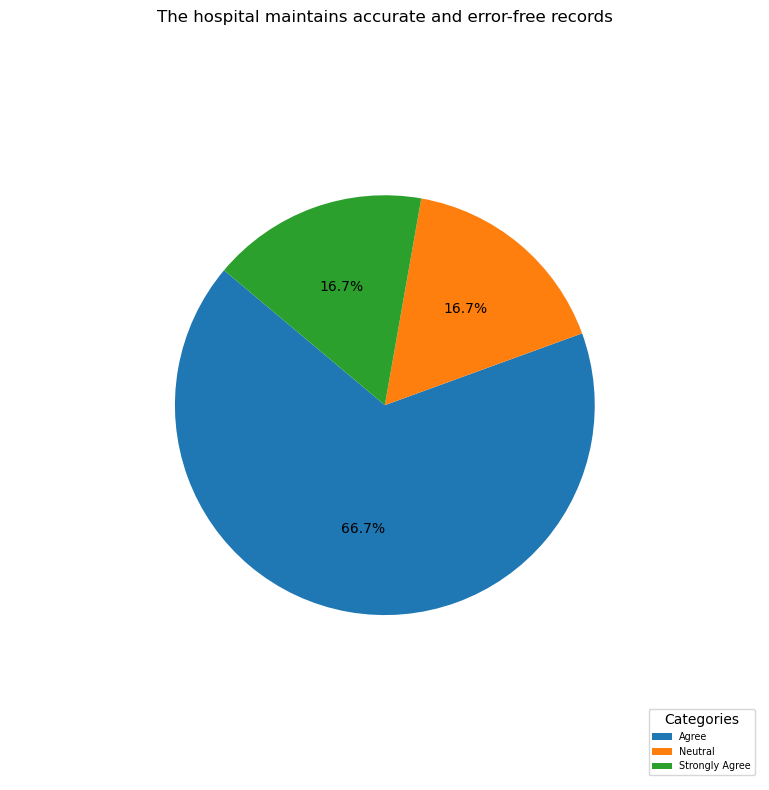

In [20]:
startColumnIndex = halisi_df.columns.get_loc("When a hospital employee promises to do something by a particular time, they do it")
endColumnIndex = halisi_df.columns.get_loc("The hospital maintains accurate and error-free records")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Perception(Responsiveness)

<hr>

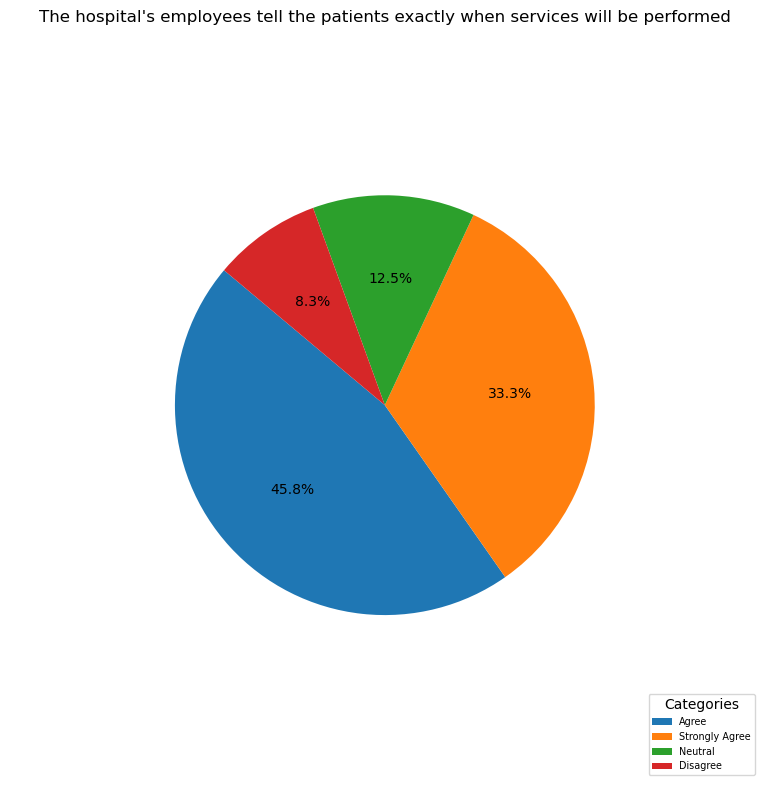

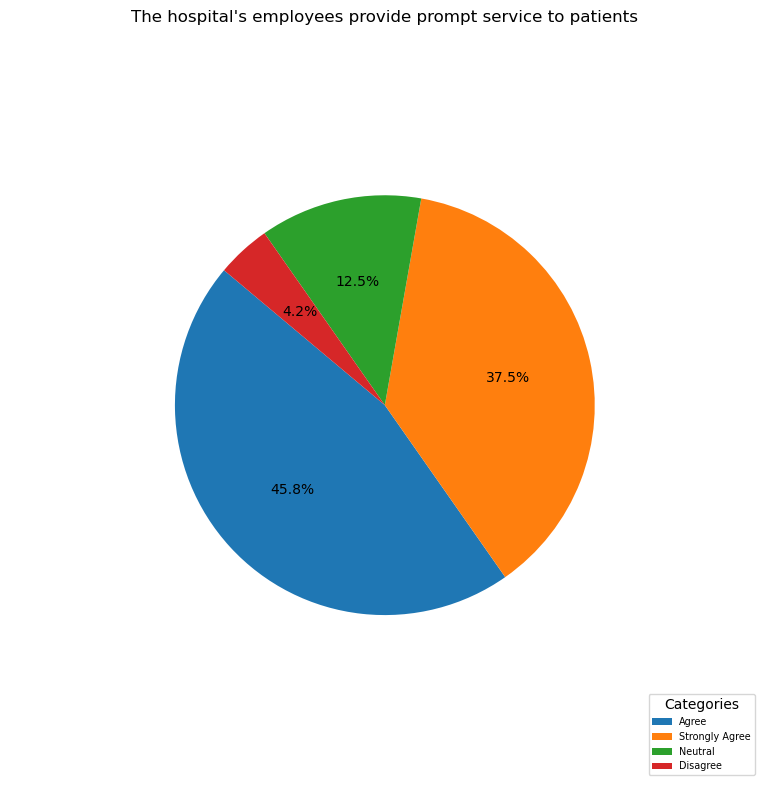

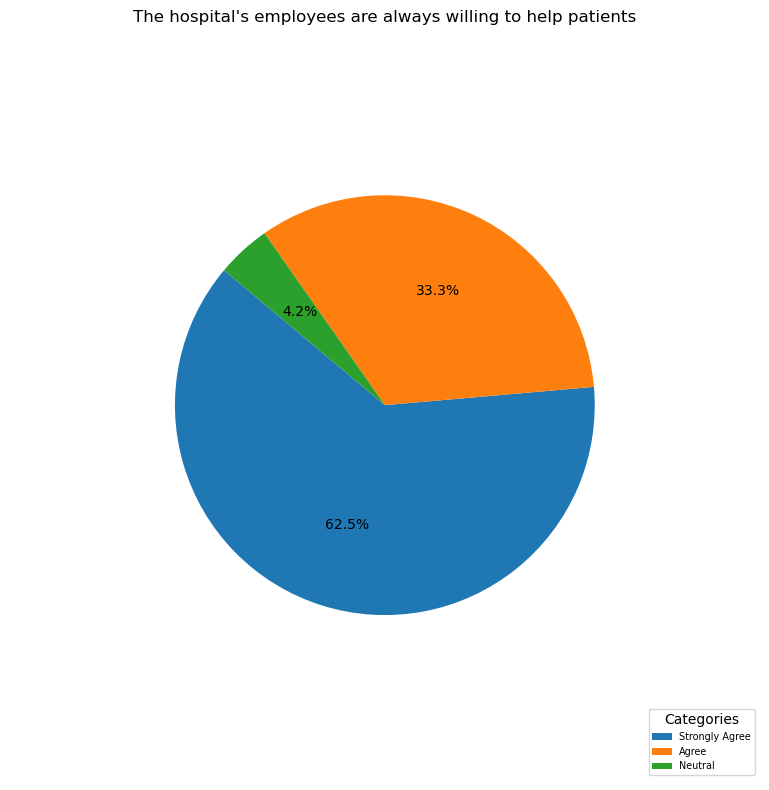

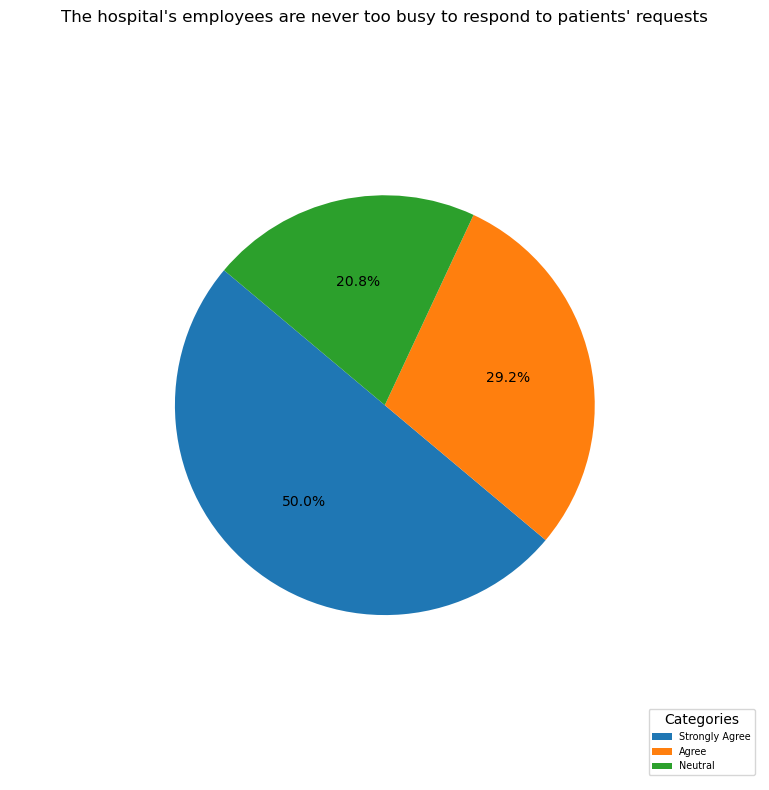

In [21]:
startColumnIndex = halisi_df.columns.get_loc("The hospital's employees tell the patients exactly when services will be performed")
endColumnIndex = halisi_df.columns.get_loc("The hospital's employees are never too busy to respond to patients' requests")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Perception(Assurance)

<hr>

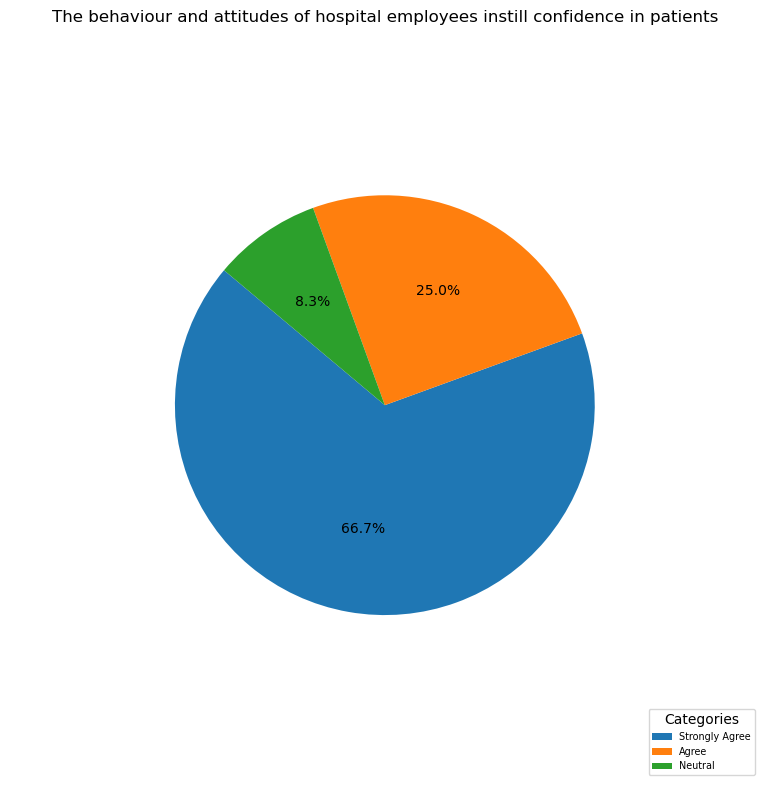

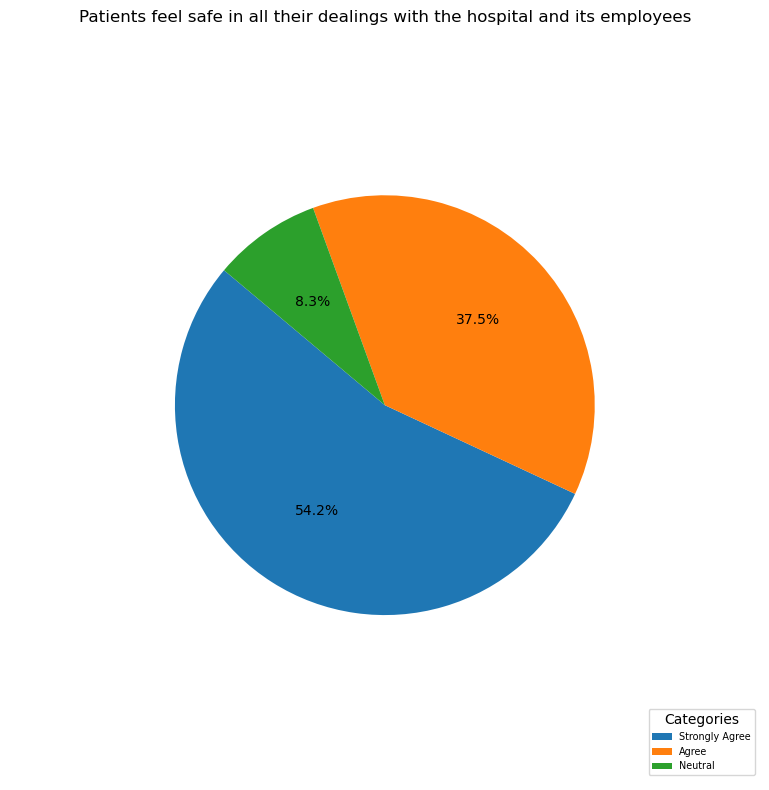

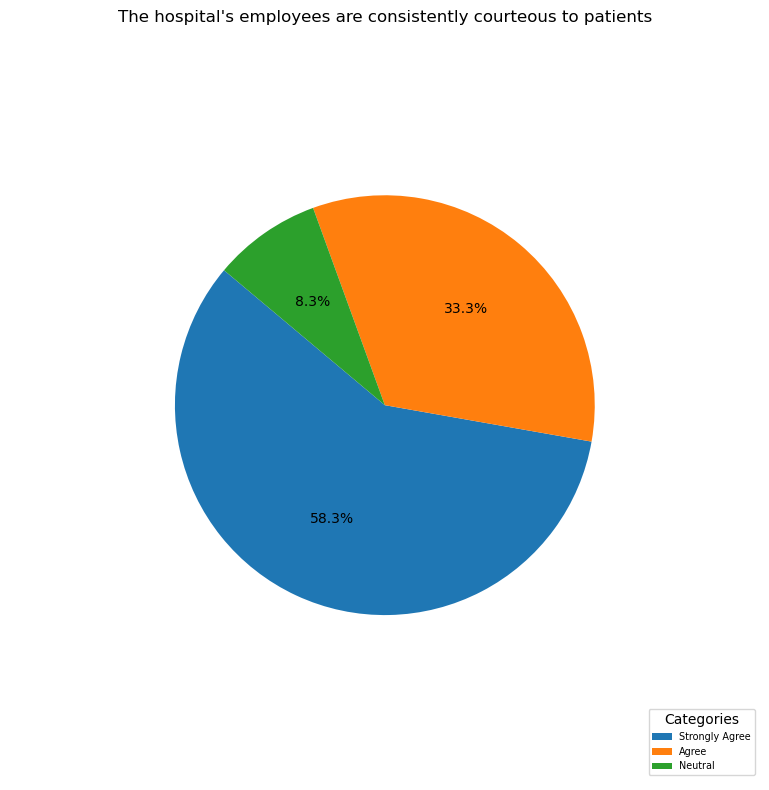

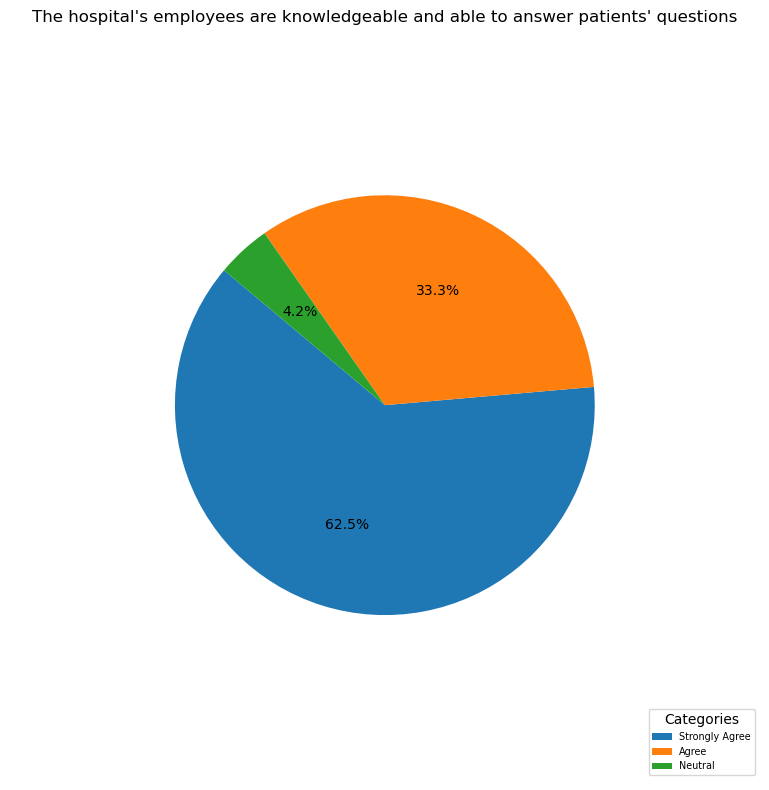

In [22]:
startColumnIndex = halisi_df.columns.get_loc("The behaviour and attitudes of hospital employees instill confidence in patients")
endColumnIndex = halisi_df.columns.get_loc("The hospital's employees are knowledgeable and able to answer patients' questions")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

<hr>

## Deeper Visual insights on Hospital Services based on  Perception(Empathy)

<hr>

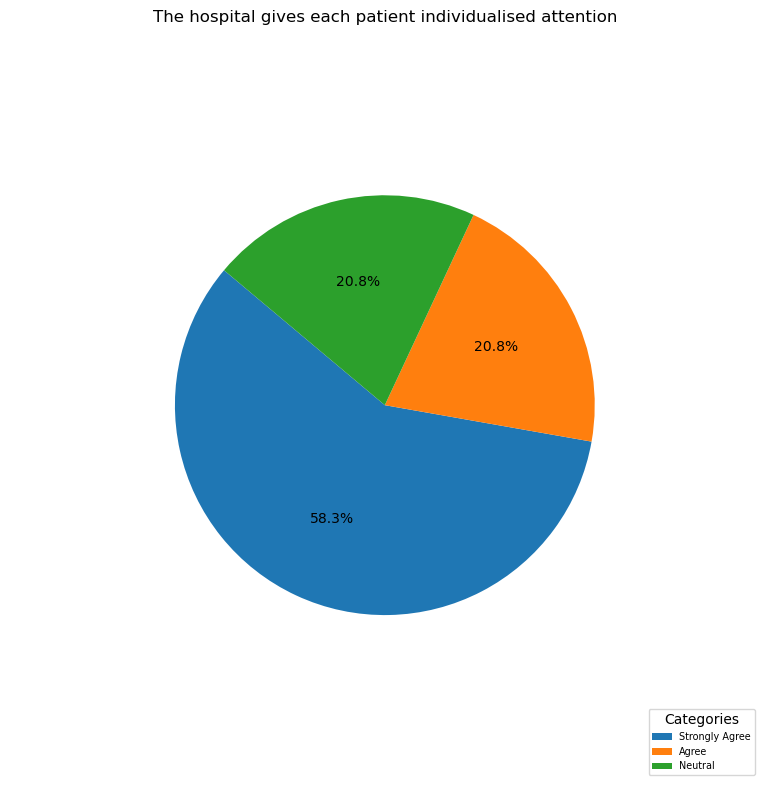

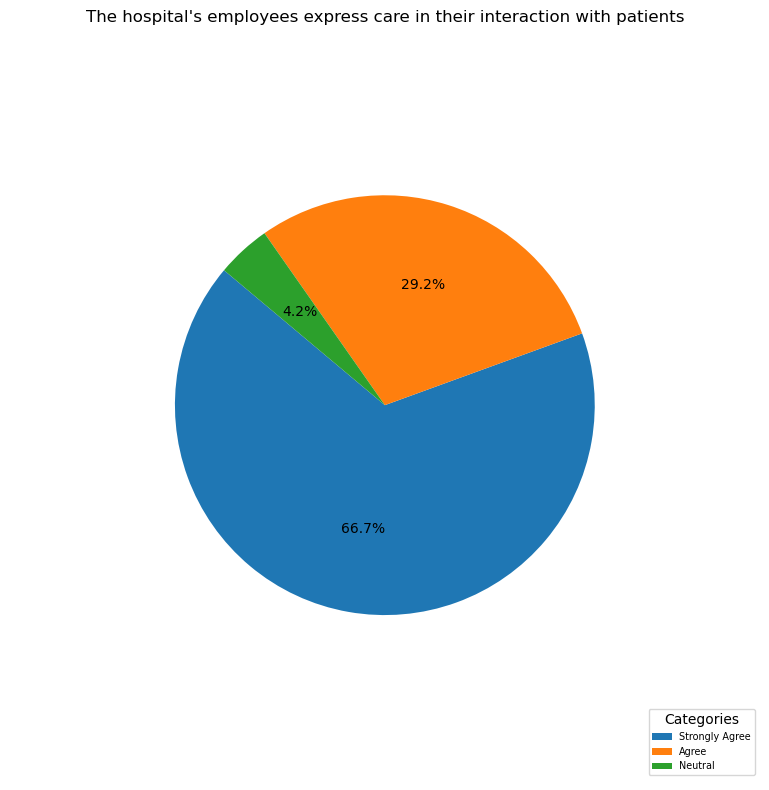

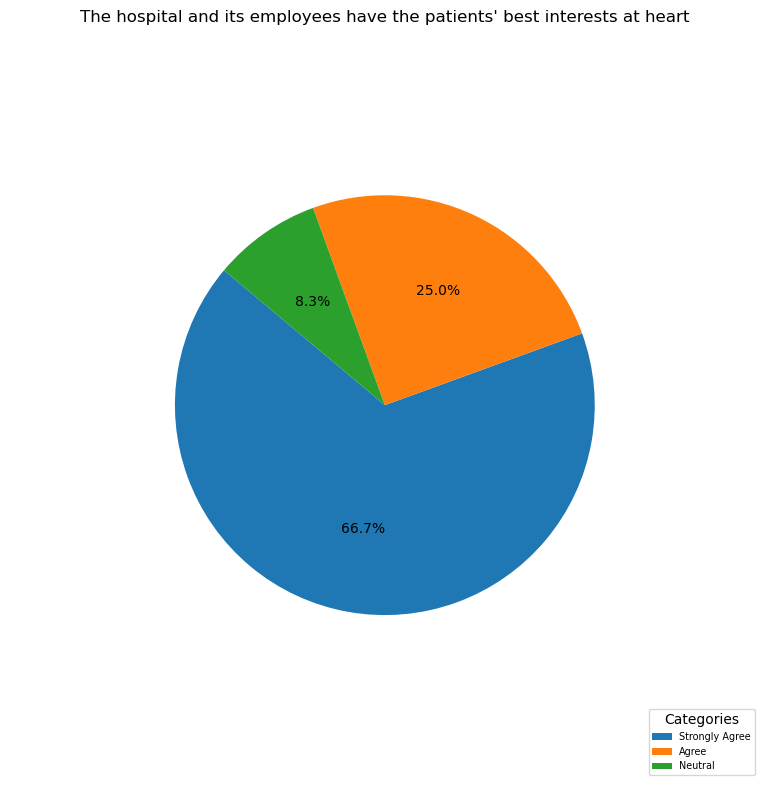

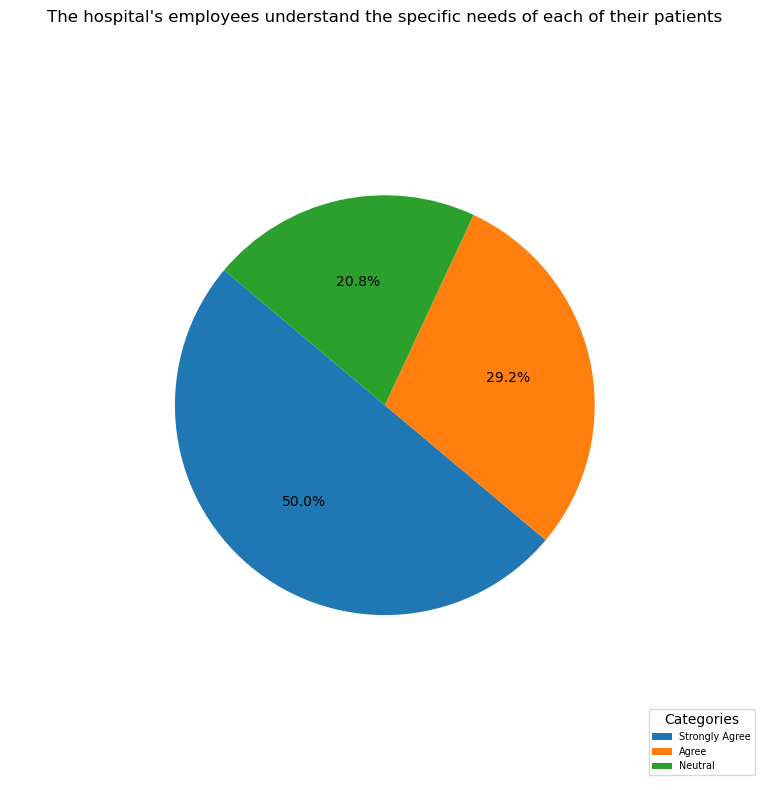

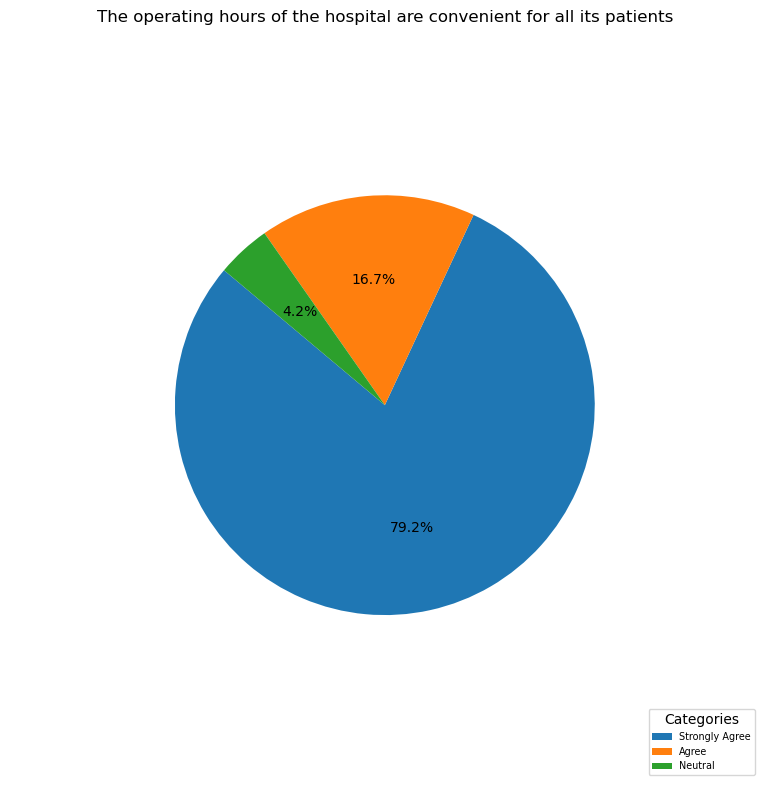

In [23]:
startColumnIndex = halisi_df.columns.get_loc("The hospital gives each patient individualised attention")
endColumnIndex = halisi_df.columns.get_loc("The operating hours of the hospital are convenient for all its patients")

# Loop through the columns and apply the mapping
for colIndex in range(startColumnIndex, endColumnIndex + 1):
    columnName = halisi_df.columns[colIndex]
    plotPieChart(halisi_df, columnName, categoryAgreeDisagree, columnName)

# Cronbach Alpha test

In [24]:
halisi_df.columns

Index(['Timestamp',
       'Have you fully understood the purpose of this survey and how your information will be handled?',
       'Informed Consent options', 'What gender do you identify as?',
       'What is your age?',
       'What is the highest level of education you have completed?',
       'What is your current work status?',
       'How do you pay for the majority of your medical expenses?',
       'What is your average monthly household income?',
       'The hospital should have modern, up-to-date equipment',
       'The hospital's physical facilities should be clean and visually appealing (reception, waiting area, consultation rooms, toilets, wards)',
       'The hospital's employees should be well-dressed and have a neat and professional appearance',
       'Materials associated with the service should be visually appealing',
       'When a hospital employee promises to do something by a particular time, they should do it',
       'When a patient has a problem, the hospital

In [25]:
def generateCSV(fileName, start, stop):
    columnsToSelect =slice(start,stop)
    # Select columns using slicing
    selected_df = halisi_df.iloc[:, columnsToSelect]
    # Save to CSV file
    selected_df.to_csv(fileName, index=False)  # Optionally exclude index from CSV
    print(f"CSV file created: {fileName}")


In [26]:
#  Expectations
startExpectationColumnIndex = halisi_df.columns.get_loc('The hospital should have modern, up-to-date equipment')
endExpectationColumnIndex = halisi_df.columns.get_loc('The hospital has modern, up-to-date equipment')
generateCSV('expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

# Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc('The hospital has modern, up-to-date equipment')
endPerceptionColumnIndex = halisi_df.columns.get_loc('Which feature is the most important to you?')
generateCSV('perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: expectations.csv
CSV file created: perception.csv


In [27]:
# Expectation:
# Tangibles
# Reliability
# Responsiveness
# Assurance
# Empathy

# Perception:
# Tangibles
# Reliability
# Responsiveness
# Assurance
# Empathy

In [28]:
#Tangibles - Expectation
startExpectationColumnIndex = halisi_df.columns.get_loc('The hospital should have modern, up-to-date equipment')
endExpectationColumnIndex = halisi_df.columns.get_loc('When a hospital employee promises to do something by a particular time, they should do it')
generateCSV('tangibles_expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

# Tangibles- Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc('The hospital has modern, up-to-date equipment')
endPerceptionColumnIndex = halisi_df.columns.get_loc('When a hospital employee promises to do something by a particular time, they do it')
generateCSV('tangible_perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: tangibles_expectations.csv
CSV file created: tangible_perception.csv


In [29]:
#Reliability - Expectation
startExpectationColumnIndex = halisi_df.columns.get_loc('When a hospital employee promises to do something by a particular time, they should do it')
endExpectationColumnIndex = halisi_df.columns.get_loc("The hospital's employees should tell the patient exactly when services will be performed")
generateCSV('reliability_expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

# Reliability- Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc('When a hospital employee promises to do something by a particular time, they do it')
endPerceptionColumnIndex = halisi_df.columns.get_loc("The hospital's employees tell the patients exactly when services will be performed")
generateCSV('reliability_perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: reliability_expectations.csv
CSV file created: reliability_perception.csv


In [30]:
#Responsiveness - Expectation
startExpectationColumnIndex = halisi_df.columns.get_loc("The hospital's employees should tell the patient exactly when services will be performed")
endExpectationColumnIndex = halisi_df.columns.get_loc('The behaviour and attitudes of hospital employees should instill confidence in patients')
generateCSV('responsiveness_expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

# Responsiveness- Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc("The hospital's employees tell the patients exactly when services will be performed")
endPerceptionColumnIndex = halisi_df.columns.get_loc('The behaviour and attitudes of hospital employees instill confidence in patients')
generateCSV('responsiveness_perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: responsiveness_expectations.csv
CSV file created: responsiveness_perception.csv


In [31]:
#Assurance - Expectation
startExpectationColumnIndex = halisi_df.columns.get_loc('The behaviour and attitudes of hospital employees should instill confidence in patients')
endExpectationColumnIndex = halisi_df.columns.get_loc( 'The hospital should give each patient individualised attention')
generateCSV('assurance_expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

# Assurance- Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc('The behaviour and attitudes of hospital employees instill confidence in patients')
endPerceptionColumnIndex = halisi_df.columns.get_loc('The hospital gives each patient individualised attention')
generateCSV('assurance_perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: assurance_expectations.csv
CSV file created: assurance_perception.csv


In [32]:
#Empathy - Expectation
startExpectationColumnIndex = halisi_df.columns.get_loc("The hospital should give each patient individualised attention")
endExpectationColumnIndex = halisi_df.columns.get_loc('The hospital has modern, up-to-date equipment')
generateCSV('empathy_expectations.csv', startExpectationColumnIndex,endExpectationColumnIndex)

#Empathy- Perception
startPerceptionColumnIndex = halisi_df.columns.get_loc("The hospital gives each patient individualised attention")
endPerceptionColumnIndex = halisi_df.columns.get_loc('Which feature is the most important to you?')
generateCSV('empathy_perception.csv', startPerceptionColumnIndex,endPerceptionColumnIndex)


CSV file created: empathy_expectations.csv
CSV file created: empathy_perception.csv
